<a href="https://colab.research.google.com/github/lucasllimati/Bootcamp-Data-Science-Aplicada/blob/main/05_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.Entendendo a série temporal

Analisando dados de COVID com Python e Pandas
Dataset: https://www.seade.gov.br/coronavirus/


# Aula 1.3

In [2]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv(url, sep=';')

In [5]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [6]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [7]:
import matplotlib as mpl

In [8]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [9]:
import seaborn as sns

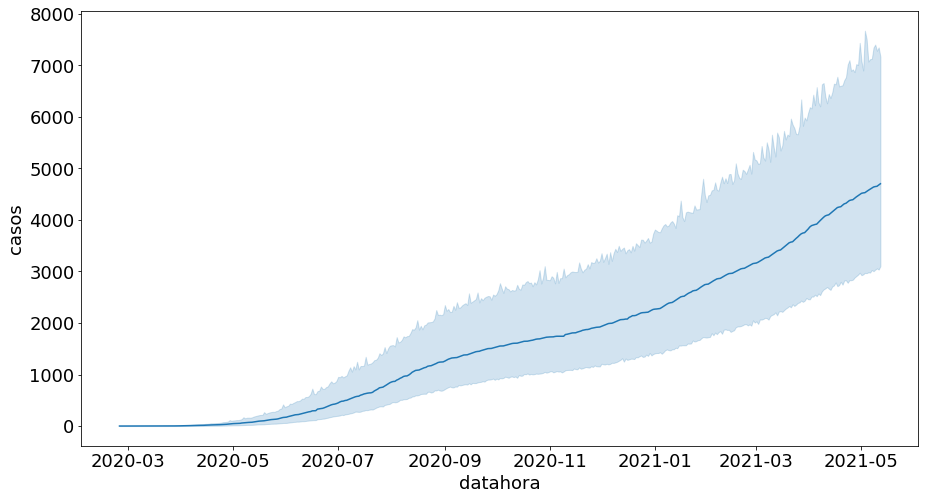

In [10]:
sns.lineplot(x='datahora', y='casos', data=dados)

$$e^x$$

In [11]:
import numpy as np

In [12]:
eixo_x = np.linspace(-2,2,100)

In [13]:
y_exp = np.exp(eixo_x)

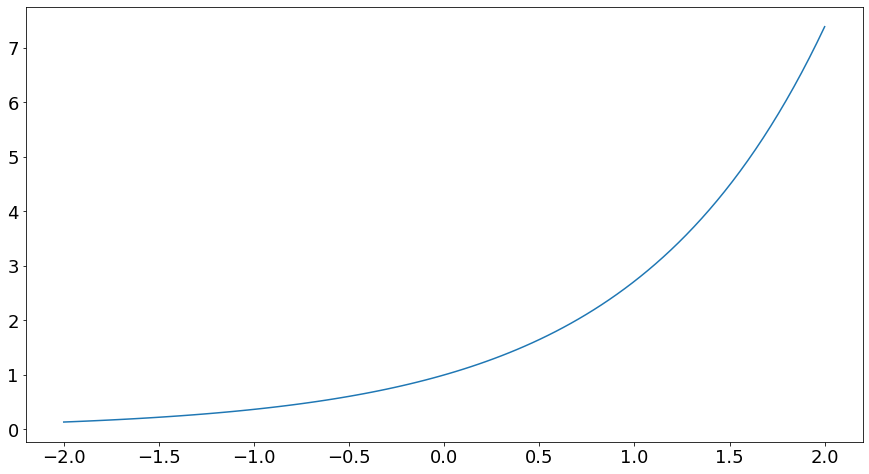

In [14]:
sns.lineplot(x=eixo_x, y=y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

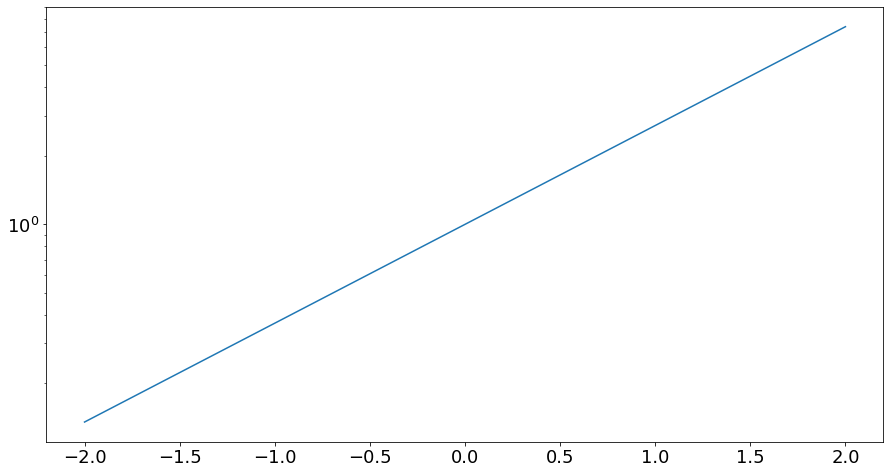

In [15]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [16]:
dados_sp = dados.query('nome_munic == "São Paulo"')

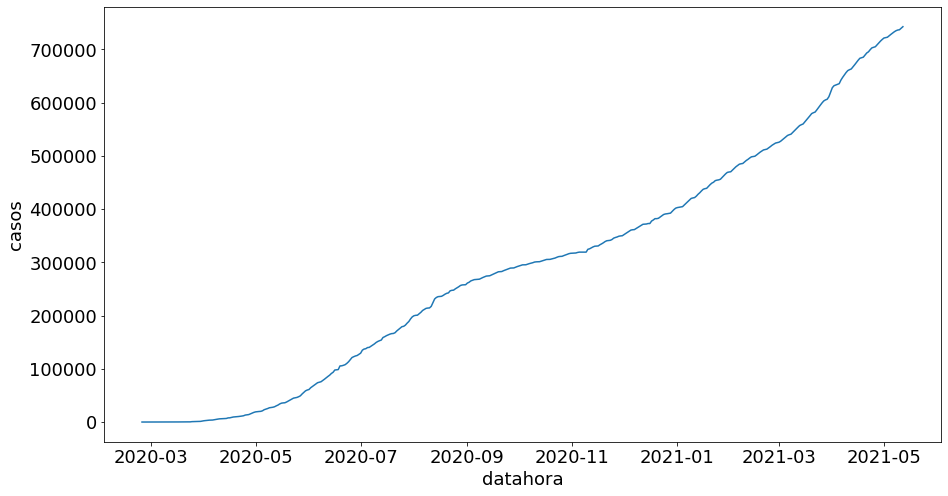

In [17]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)

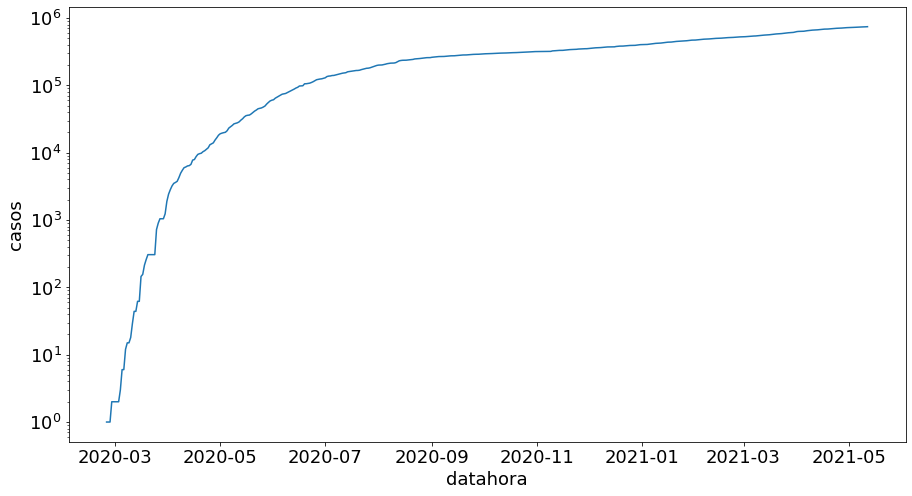

In [18]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

## Desafio 01: Filtrar a base com alguma outra função.

Temos as alternativas abaixo para gerar o mesmo recorte no dataset.

In [19]:
df_sp = dados[(dados['nome_munic'] == 'São Paulo')]
df_sp.shape

(443, 26)

In [20]:
df_sp2 = dados.loc[(dados['nome_munic'] == 'São Paulo')]
df_sp2.shape

(443, 26)

## Desafio 02: Escolher outro municipio.

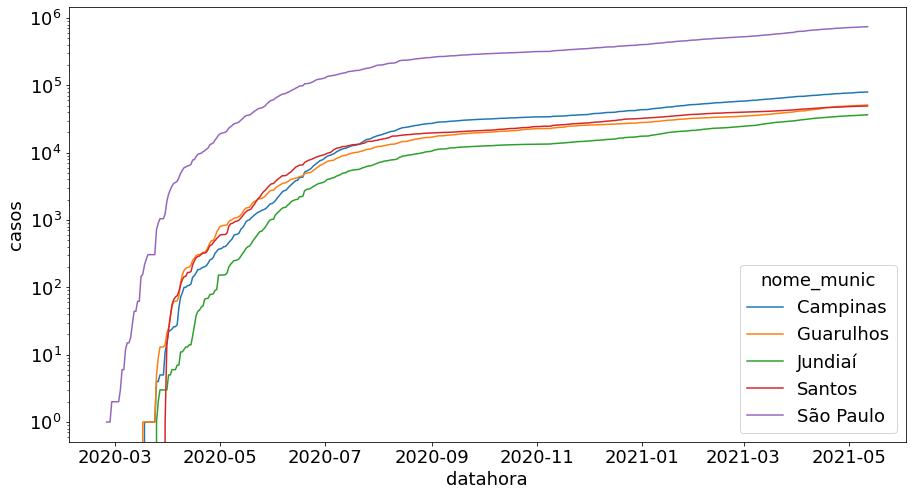

In [21]:
lista_cidades = ['São Paulo','Santos','Campinas','Jundiaí','Guarulhos']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]
sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

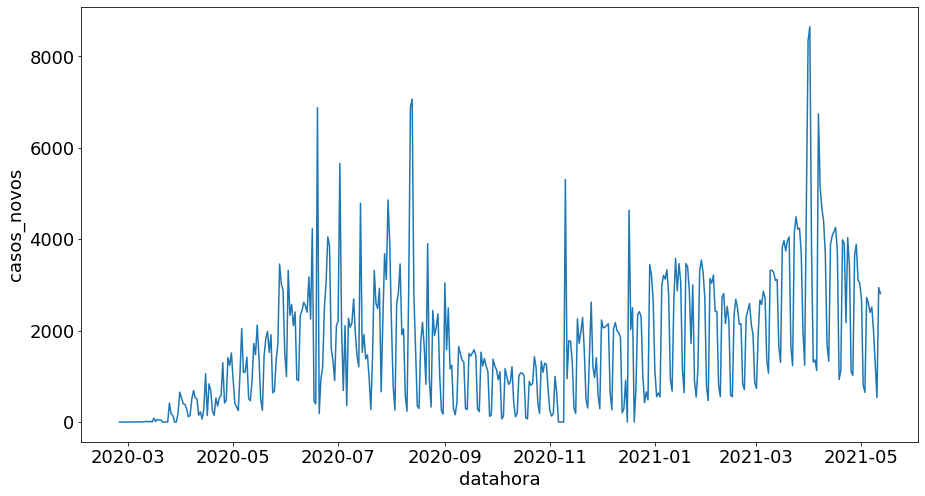

In [22]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [23]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [24]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [25]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo

0  diferenciado
0   1.0           NaN
1   2.0           1.0
2   3.0           1.0
3   4.0           1.0
4   5.0           1.0
5   6.0           1.0
6   7.0           1.0
7   8.0           1.0
8   9.0           1.0
9  10.0           1.0

In [26]:
# sns.lineplot(data = dados_exemplo)
# sns.lineplot(data = dados_exemplo, x = 0, y = 'diferenciado', color = 'red')

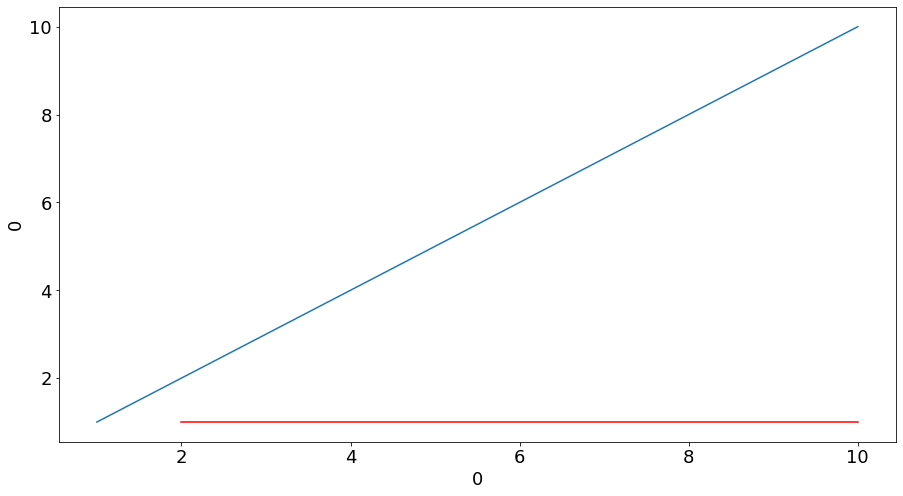

In [27]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo, color = 'red')

$$ y = ax + b $$
$$ y = 1x + b $$

In [28]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


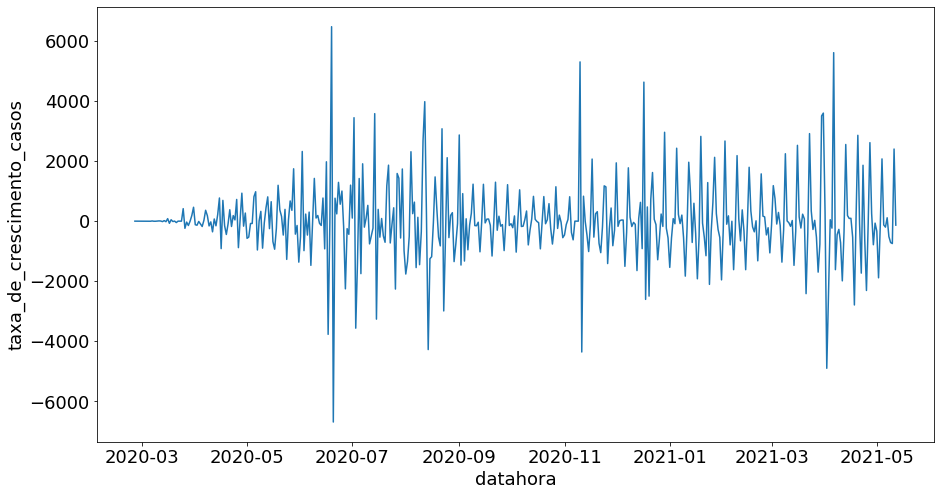

In [29]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

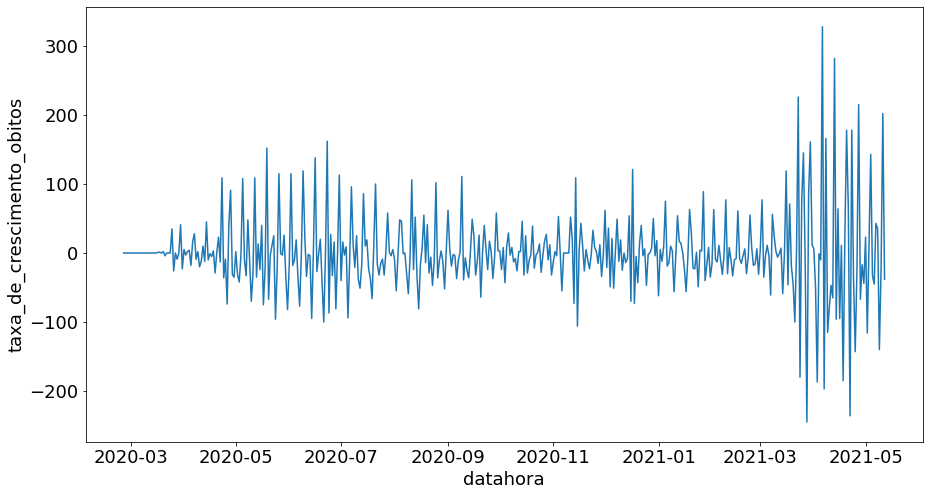

In [30]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

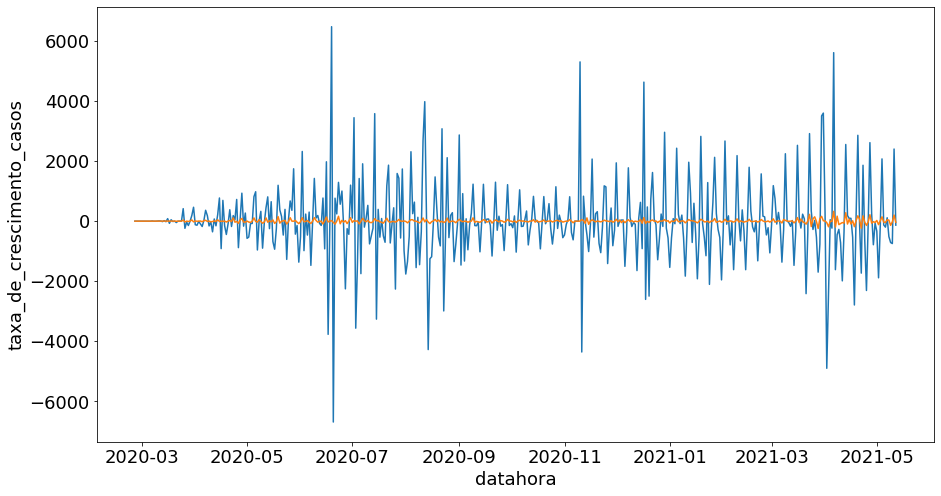

In [31]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [32]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

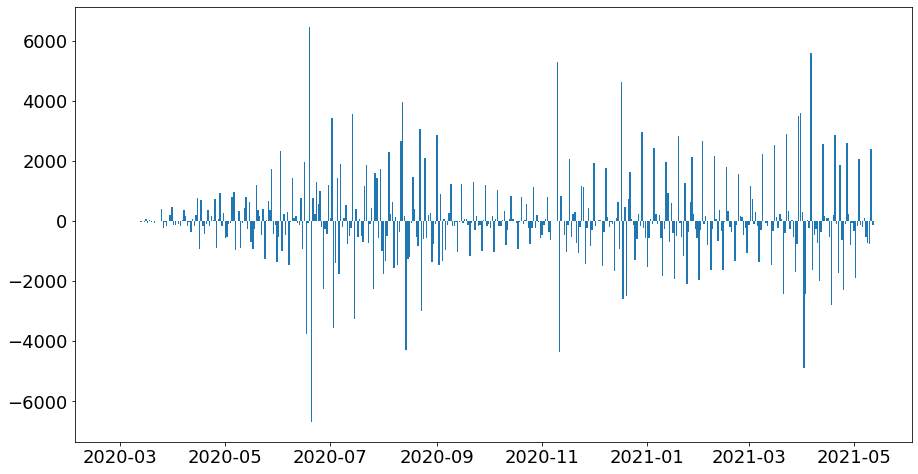

In [33]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [34]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

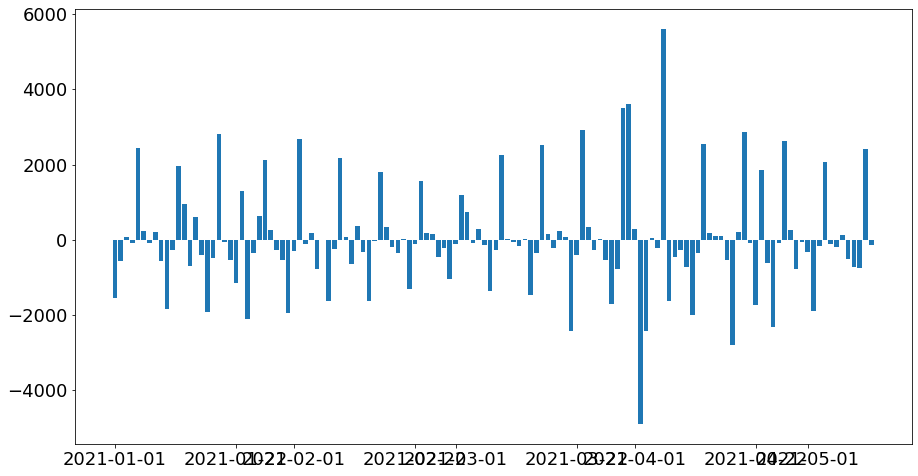

In [36]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [37]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


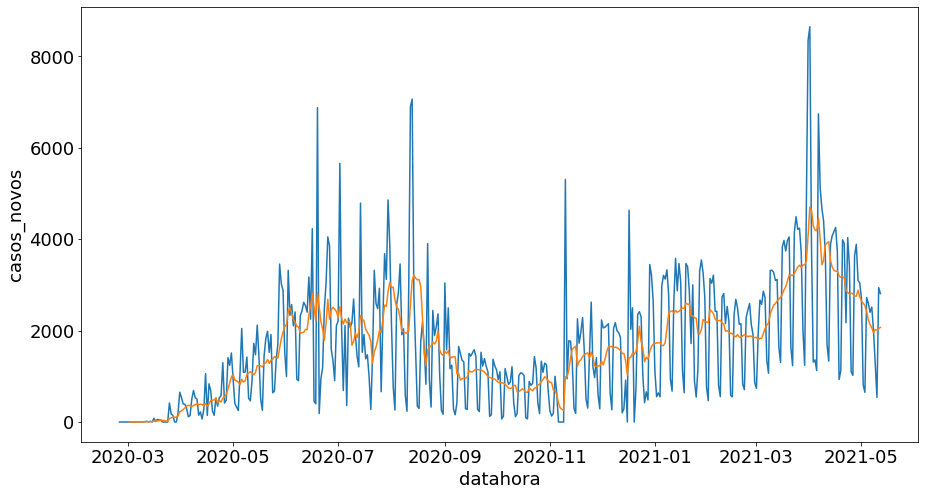

In [38]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

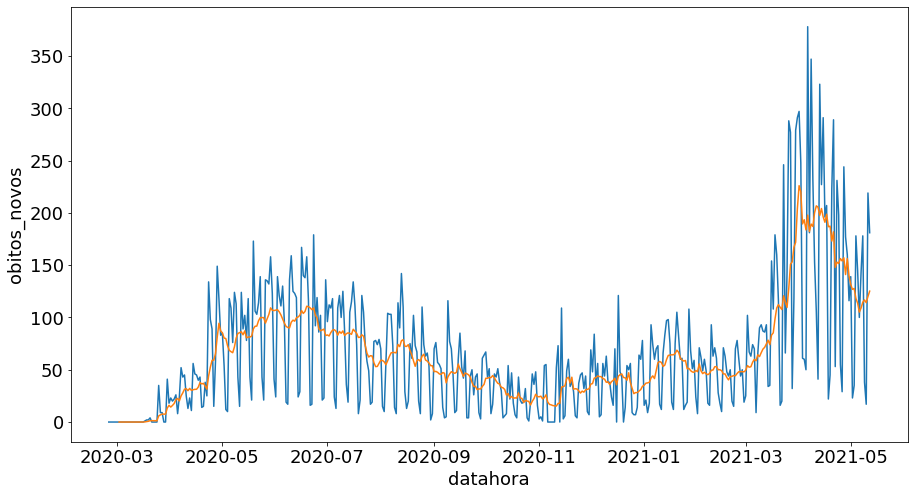

In [39]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)

## Desafio 01: Mostrar o notebook sem os warnings

Estou deixando os códigos comentados, por enquanto, para não ficar sem os warnings, mas a solução está abaixo.

In [40]:
#import warnings
#warnings.filterwarnings('ignore')

## Desafio 02: Pico da taxa de casos novos coincide com a taxa dos óbitos novos

Optei por trabalhar com um eixo y secundário para ficar mais fácil de visualizar as variações, já que usando um eixo único a escala praticamente impossibilita a visualização dos óbitos.

O pico de casos novos, em azul, ocorrido do final de junho/2020 não parece ter tido um impacto muito grande na taxa de óbitos (em laranja), bem como no pico do final de 2020.

Já o pico de abril a maio de 2021 parece ter tido mais impacto, deixando a taxa de óbitos com maior oscilação.

In [41]:
dados_sp['taxa_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


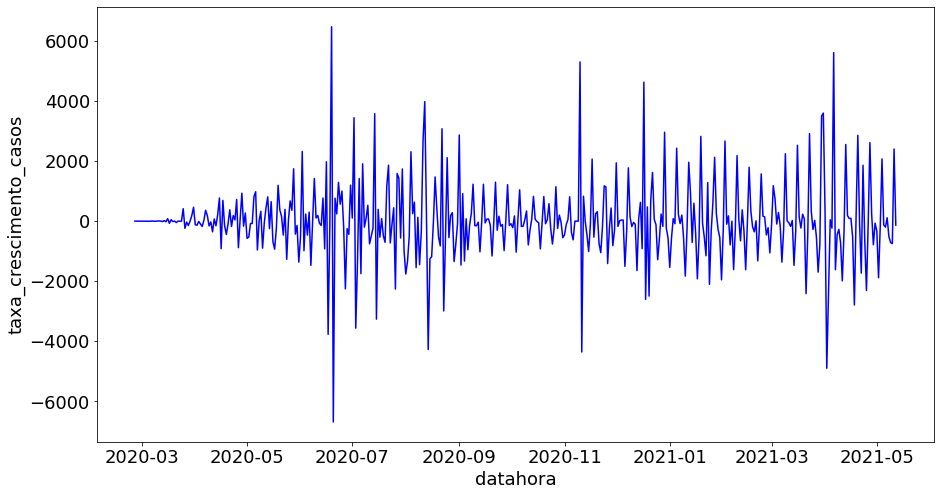

In [42]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_sp,
             color = 'blue')

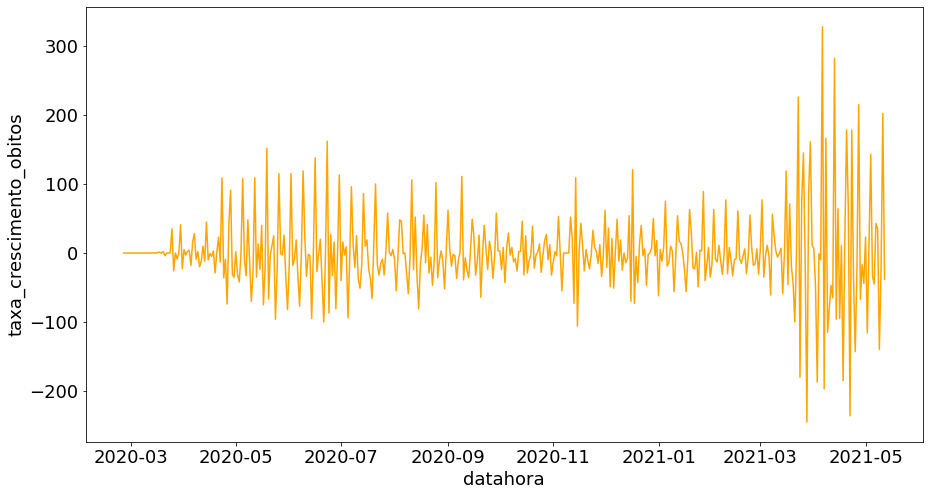

In [43]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_sp,
             color = 'orange')

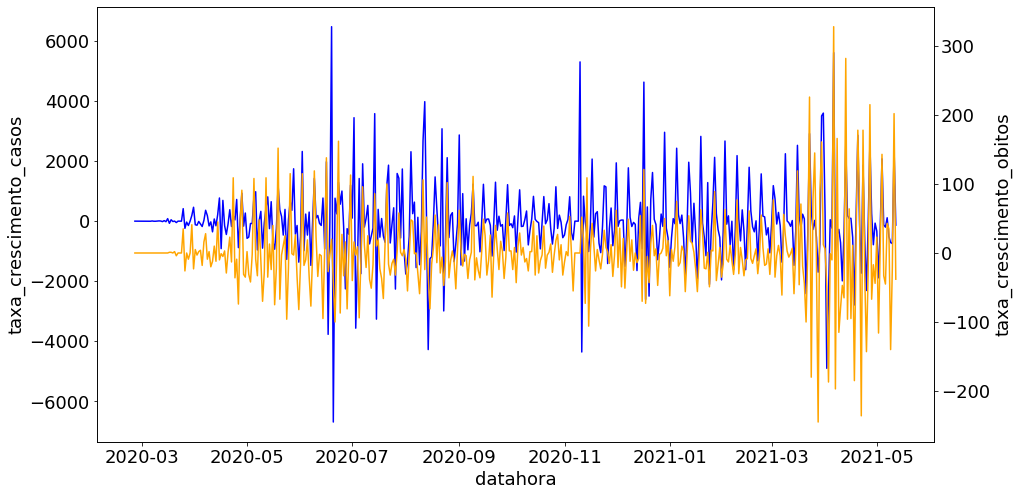

In [44]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_sp,
             color = 'blue')

plt.twinx()

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_sp,
             color = 'orange')

## Desafio 03: Deixar os gráficos mais bonitos

Ajustar inclinação das labels do eixo x, colocar títulos, nomes dos eixos.

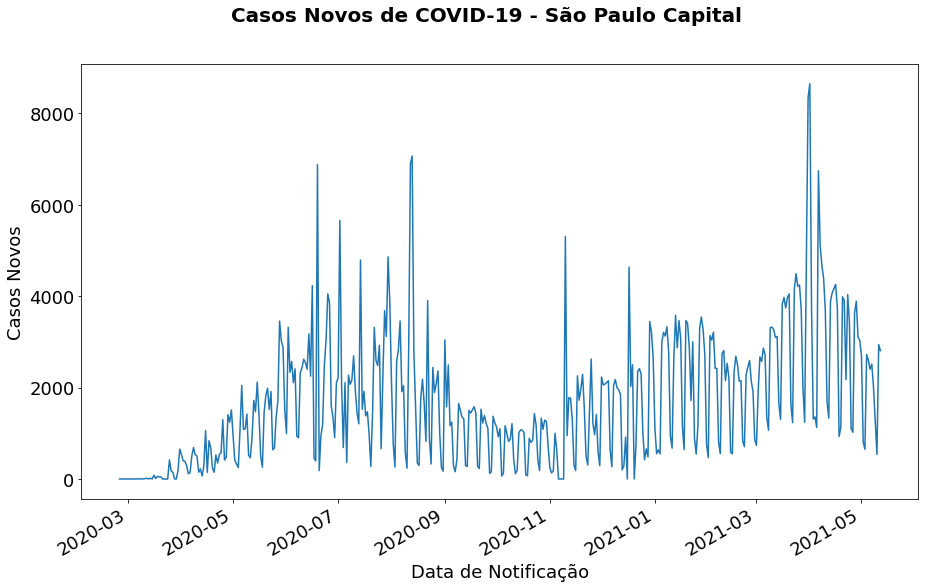

In [45]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_sp)

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data de Notificação')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linhas para barra.

In [46]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

# window = 7, trata a janela de observação como sendo de 7 dias
# center = False).mean() joga o ponto para o final da semana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


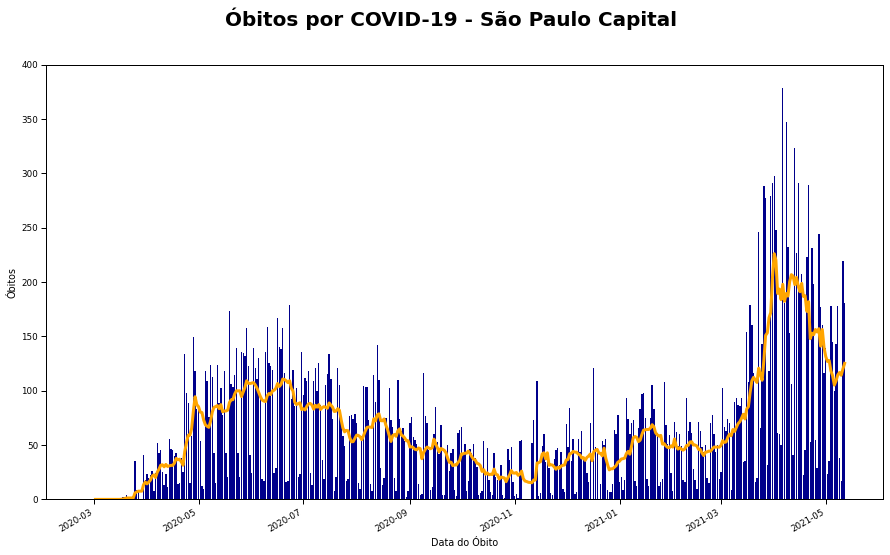

In [47]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'media_movel_obitos',
             data = dados_sp,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_sp['datahora'],
        height = dados_sp['obitos_novos'],
        color = 'darkblue')

plt.ylim(0,400)
plt.suptitle('Óbitos por COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data do Óbito')
plt.ylabel('Óbitos')
plt.xticks(rotation=30,ha='right')
plt.show()

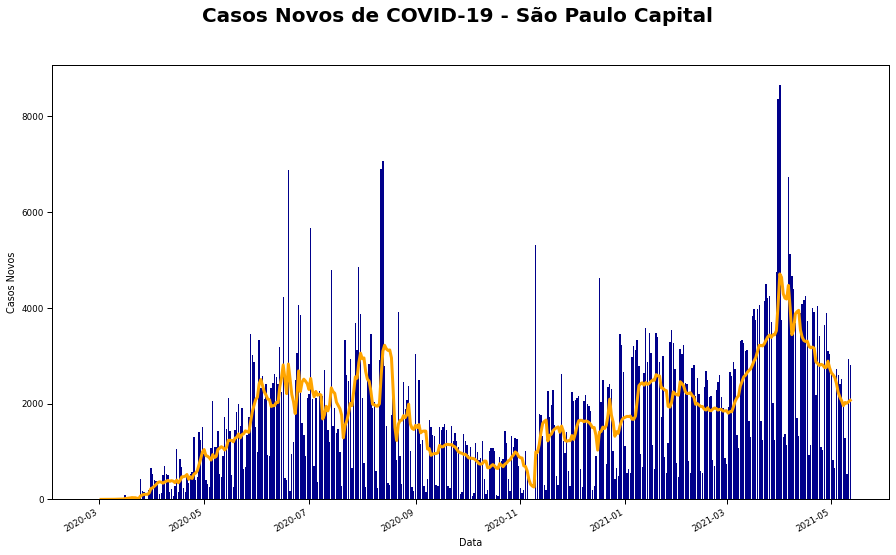

In [48]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'media_movel_casos',
             data = dados_sp,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_sp['datahora'],
        height = dados_sp['casos_novos'],
        color = 'darkblue')

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

## Desafio 05: Mover o número de óbitos alguns dias e verificar o resultado no gráfico

Resolvi gerar essas visualizações adicionais a título de curiosidade, para ver o quanto mais ficariam suavizadas as curvas dobrando a janela de média móvel para 14 dias.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


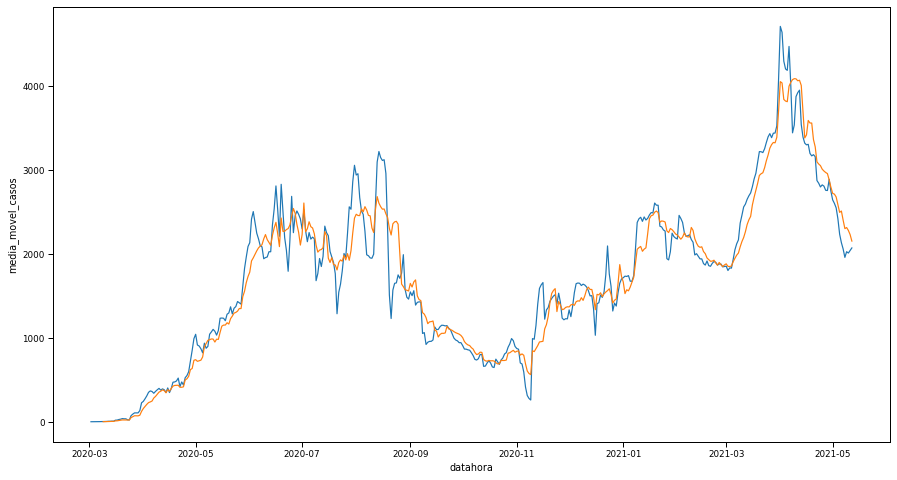

In [49]:
dados_sp['MM14 Casos Novos'] = dados_sp['casos_novos'].rolling(window = 14, center = False).mean()
sns.lineplot(x = 'datahora',
             y = 'media_movel_casos',
             data = dados_sp)
sns.lineplot(x = 'datahora',
             y = 'MM14 Casos Novos',
             data = dados_sp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


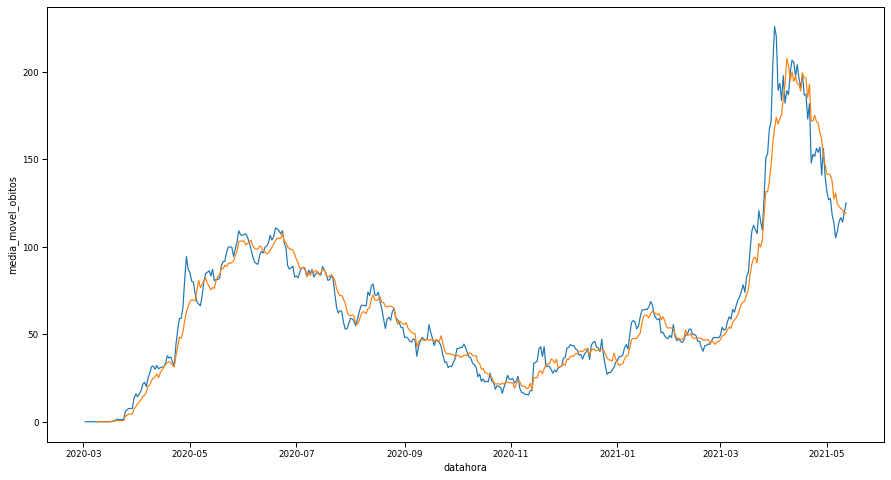

In [50]:
dados_sp['MM14 Óbitos Novos'] = dados_sp['obitos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'media_movel_obitos',
             data = dados_sp)
sns.lineplot(x = 'datahora',
             y = 'MM14 Óbitos Novos',
             data = dados_sp)

## Desafio 06: Função de Correlação cruzada dos óbitos e casos.

>Deslocando os dados de óbitos 14 dias para frente e 14 dias para trás em relação aos dados de casos novos, verificar se isso altera a correlação, deixando o gráfico mais parecendo uma reta.

---

Eu acho que deslocar os óbitos para frente não faz sentido, vale mais a pena testar mais janelas de dias para trás. Com isso vamos comparar os óbitos do dia **Z** com os casos do dia **Z - 14**, que é a relação mais provável, pois o paciente vai adoecer e, depois de um tempo, ou vai se curar ou vai falecer.

Pesquisando na internet, encontrei links que indicam o tempo médio entre os primeiros sintomas e o óbito variando entre 14 e 28 dias (links [aqui](https://www.cnnbrasil.com.br/saude/2021/03/24/tempo-medio-ate-morte-por-covid-19-em-utis-de-sp-caiu-4-dias-no-ultimo-trimestre) e [aqui](https://diariodonordeste.verdesmares.com.br/metro/tempo-medio-entre-inicio-de-sintomas-e-morte-por-covid-no-ceara-e-10-dias-maior-na-segunda-onda-1.3097493)).

Por isso vou gerar as colunas com os dados de óbitos antecipados em 14, 21 e 28 dias e verificar se existe uma correlação maior de alguma dessas séries com a quantidade de casos novos.

In [51]:
dados_sp['Óbitos -14'] = dados_sp['obitos_novos'].shift(-14)
dados_sp['Óbitos -21'] = dados_sp['obitos_novos'].shift(-21)
dados_sp['Óbitos -28'] = dados_sp['obitos_novos'].shift(-28)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

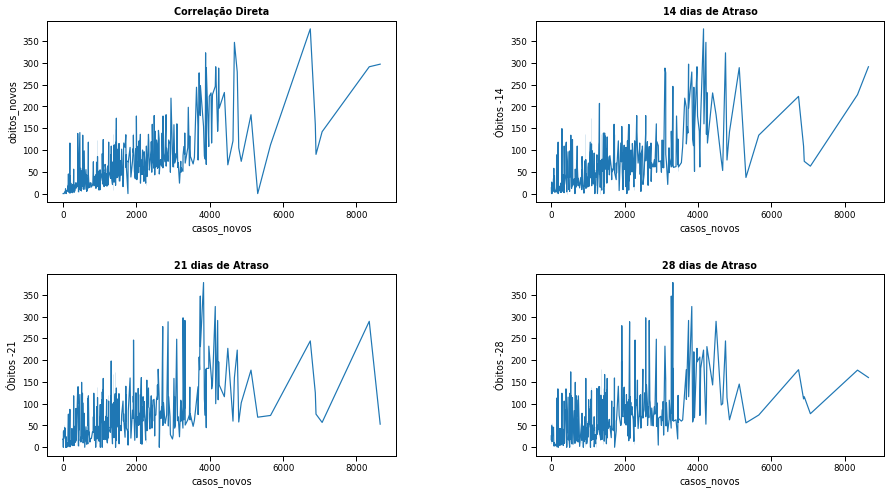

In [151]:
fig, ax = plt.subplots(nrows = 2,ncols=2)#,
                       #sharex = True, sharey = True)

ax[0,0] = sns.lineplot(x = 'casos_novos',
                       y = 'obitos_novos',
                       data = dados_sp,
                       ax = ax[0,0])
ax[0,0].set_title('Correlação Direta',fontweight='bold')

ax[0,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -14',
                       data = dados_sp,
                       ax = ax[0,1])
ax[0,1].set_title('14 dias de Atraso',fontweight='bold')

ax[1,0] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -21',
                       data = dados_sp,
                       ax = ax[1,0])
ax[1,0].set_title('21 dias de Atraso',fontweight='bold')

ax[1,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -28',
                       data = dados_sp,
                       ax = ax[1,1])
ax[1,1].set_title('28 dias de Atraso',fontweight='bold')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [152]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(0,int(dados_sp.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_sp['casos_novos']
    df_temp['obitos_desloc'] = dados_sp['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)

Maior --> 0  -  0.7355323571757685
Menor --> 157  -  -0.22513092823078476


Não percebi diferenças significativas entre os gráficos, por isso resolvi rodar o código acima, analisando qual a maior e qual a menor correlação entre os casos novos e os óbitos deslocados.

A maior correlação seria uma relação direta, mais próxima de 1, enquanto a menor correlação, quanto mais próxima de -1 indicaria uma correlação inversa.

Rodei as iterações até metade da base, pois a partir daí a quantidade de dados começa a ficar menor e pode gerar falsos resultados.

O resultado obtido foi de que a maior correlação direta é mesmo dos dados originais, sem deslocamento algum. E a correlação inversa é muito fraca, sendo o resultado mais significativo obtido com o deslocamento de 171 dias.

## Desafio 07: Estudar outros municípios

Vou tentar refazer a análise com um grupo de 3 municípios.

A ideia é pegar municípios semelhantes em termos de população. Vamos tentar com:
* Santos: 433.656 habitantes
* Diadema: 426.757 habitantes
* Jundiaí: 423.006 habitantes

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o)

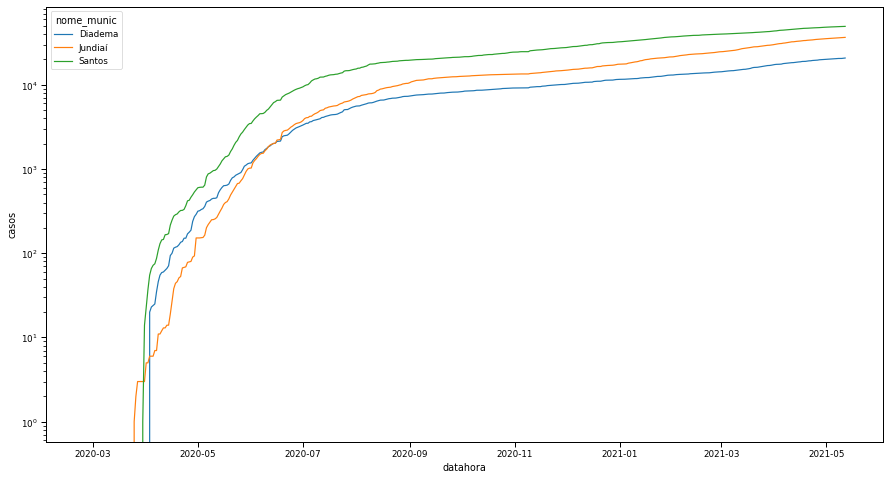

In [153]:
lista_cidades = ['Santos','Diadema','Jundiaí']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]

sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Apesar de termos um comportamento semelhante, podemos ver que a fase aguda de Jundiaí foi bem menor que as demais.

De forma geral, todas apresentaram uma curva em 3 estágios, como São Paulo Capital.

Vamos comparar as curvas de surgimento de casos novos.

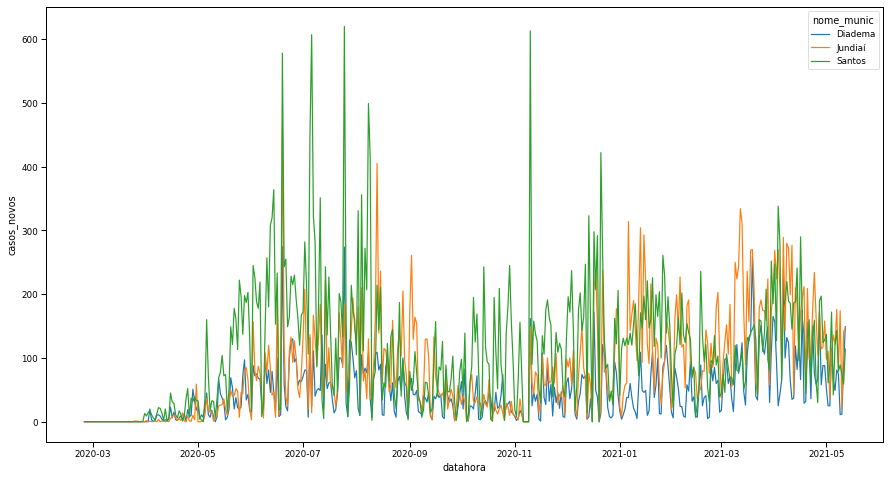

In [154]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_desafio,
             hue = 'nome_munic')

O gráfico com as linhas sobrepostas fica de difícil visualização. Vamos separar e colocar em gráficos lado a lado.

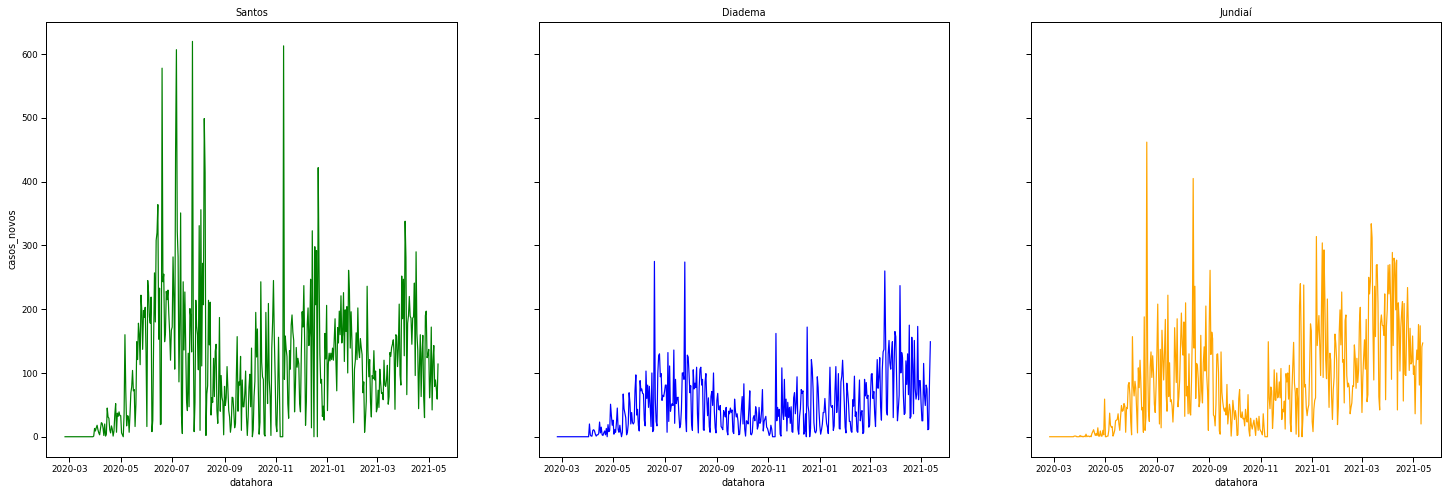

In [155]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
lista_cores = {'Diadema':'blue',
               'Jundiaí':'orange',
               'Santos':'green'}

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'casos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Apesar de estarmos lidando com cidades de populações similares, podemos verificar que o surgimento de casos novos apresentou picos muito maiores em Santos do que nas demais, sendo que Jundiaí já foi ligeiramene superior à Diadema.

In [156]:
colunas = dados.columns.to_list()
dados_desafio = pd.DataFrame(columns = colunas)

for i in lista_cidades:
    dados_temp = dados[(dados['nome_munic'] == i)]
    dados_temp['taxa_crescimento_casos'] = dados_temp[(dados_temp['nome_munic'] == i)]['casos_novos'].diff()
    dados_temp['taxa_crescimento_obitos'] = dados_temp[(dados_temp['nome_munic'] == i)]['obitos_novos'].diff()
    dados_desafio = dados_desafio.merge(dados_temp, how = 'outer')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



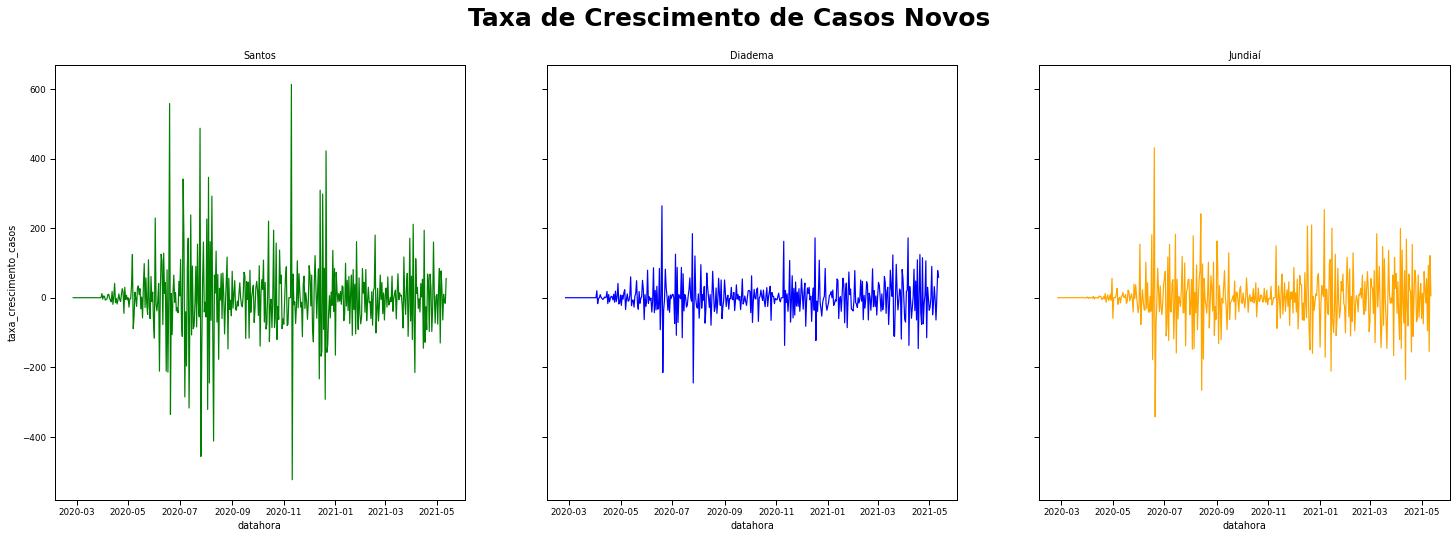

In [157]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Podemos observar que os picos de crescimento de casos em Santos se concentraram no início da pandemia, com um pico estranho no final do ano. Já o comportamento de Diadema e Jundiaí ficou semelhante, com Jundiaí em uma escala maior de valores.

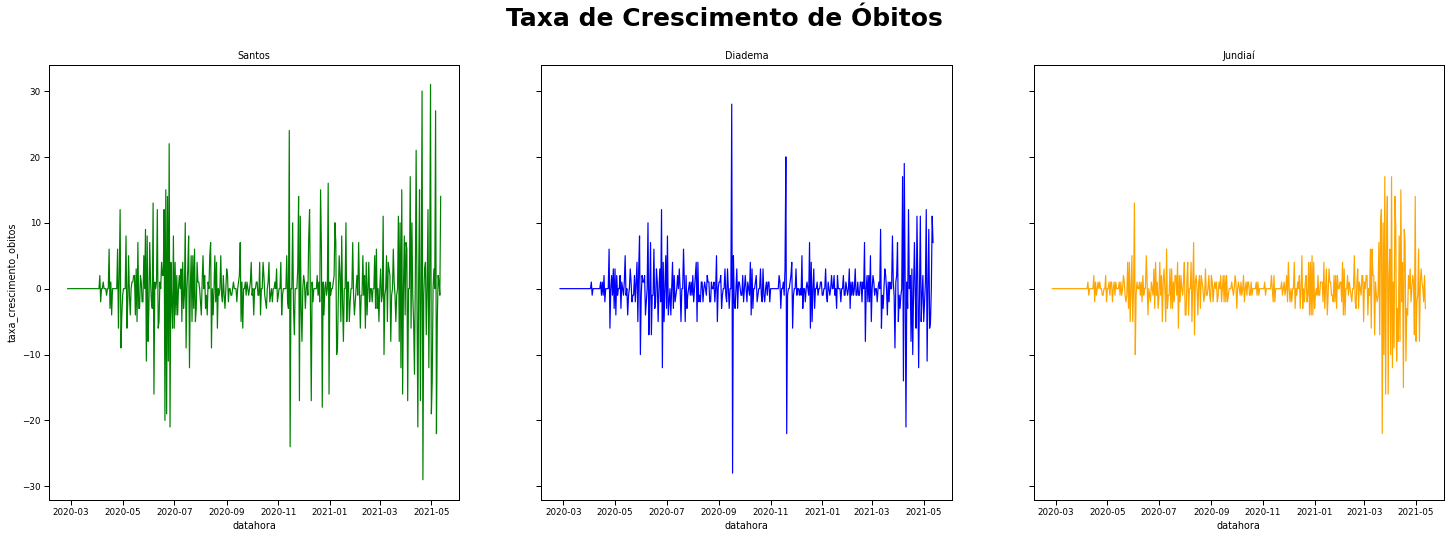

In [158]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A taxa de crescimento de óbitos apresenta uma variação maior no momento atual do que no início da pandemia. Jundiaí, nesse quesito, apresenta variações menores do que Diadema.

Santos sempre apresenta números maiores.

Chama a atenção alguns "*spikes*" nos números de Diadema, para ambos os lados (crescimento em um dia seguido de decréscimo no dia seguinte), o que parece significar retenção de notificações.

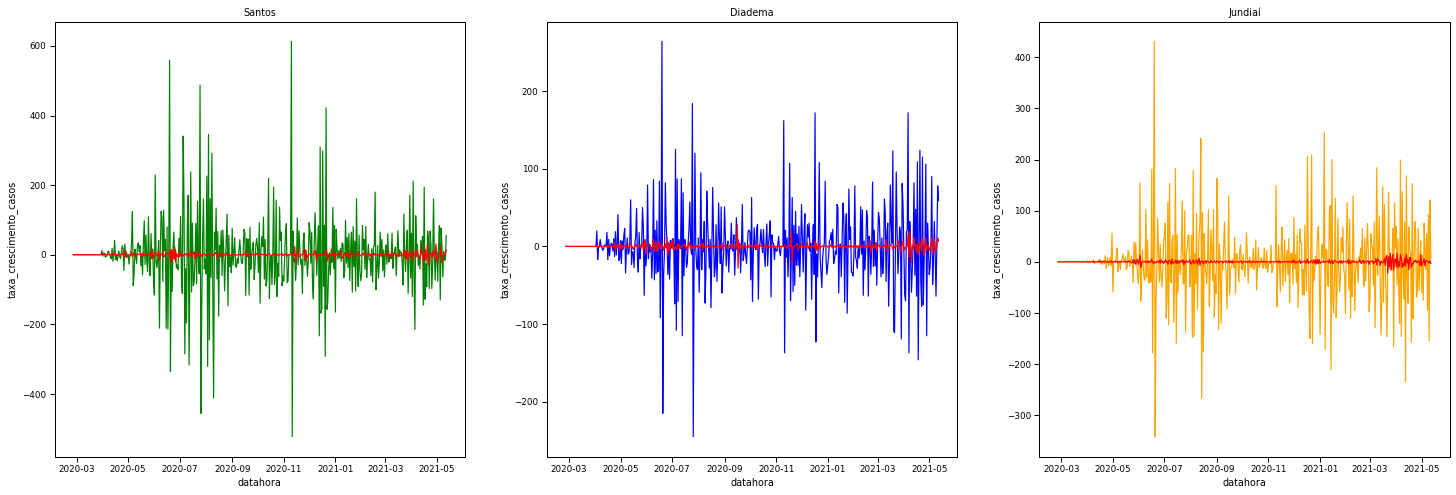

In [159]:
fig, ax = plt.subplots(ncols = 3,
#                       sharey = True,
                       figsize = (25,8))

eixo = 0
#fig.suptitle('Taxa de Crescimento de Casos Novos',
#             fontsize=25,
#             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
#    ax[eixo] = plt.twinx()
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = 'red',
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo do que vimos quando analisamos São Paulo Capital, os óbitos não parecem ter uma relação direta com o surgimento de casos novos.

Temos maior ocorrência de óbitos no final da série, possivelmente relacionados ao surgimento de variantes mais agressivas do vírus e não à quantidade de casos.

Vamos analisar as correlações dos casos novos com os óbitos deslocados para ver se alguma cidade vai apresentar valores maiores do que os 0,7355 apresentados por São Paulo Capital.

In [160]:
for x in lista_cidades:
    i_maior_correl = 0
    maior_correl = 0
    i_menor_correl = 0
    menor_correl = 0

    for i in list(range(0,int(dados_desafio[(dados_desafio['nome_munic'] == x)].shape[0]/2),1)):
        df_temp = pd.DataFrame()
        df_temp['casos'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['casos_novos']
        df_temp['obitos_desloc'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['obitos_novos'].shift(-i)
        df_temp.dropna(inplace=True)
        correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
        if correl[0,1] > maior_correl:
            maior_correl = correl[0,1]
            i_maior_correl = i
        elif correl[0,1] < menor_correl:
            menor_correl = correl[0,1]
            i_menor_correl = i
    print('\nCidade -->',x)
    print('Maior -->',i_maior_correl,' - ',maior_correl)
    print('Menor -->',i_menor_correl,' - ',menor_correl)



Cidade --> Santos
Maior --> 0  -  0.32699250667448626
Menor --> 89  -  -0.14903030970897566

Cidade --> Diadema
Maior --> 0  -  0.44848737319973014
Menor --> 74  -  -0.17046527534515316

Cidade --> Jundiaí
Maior --> 0  -  0.4922224168847251
Menor --> 157  -  -0.12374765719705087


As cidades escolhidas apresentaram correlações ainda mais fracas do que São Paulo Capital.

Só a título de curiosidade, vamos plotar os gráficos de correlação de casos novos e óbitos, sem deslocamento.

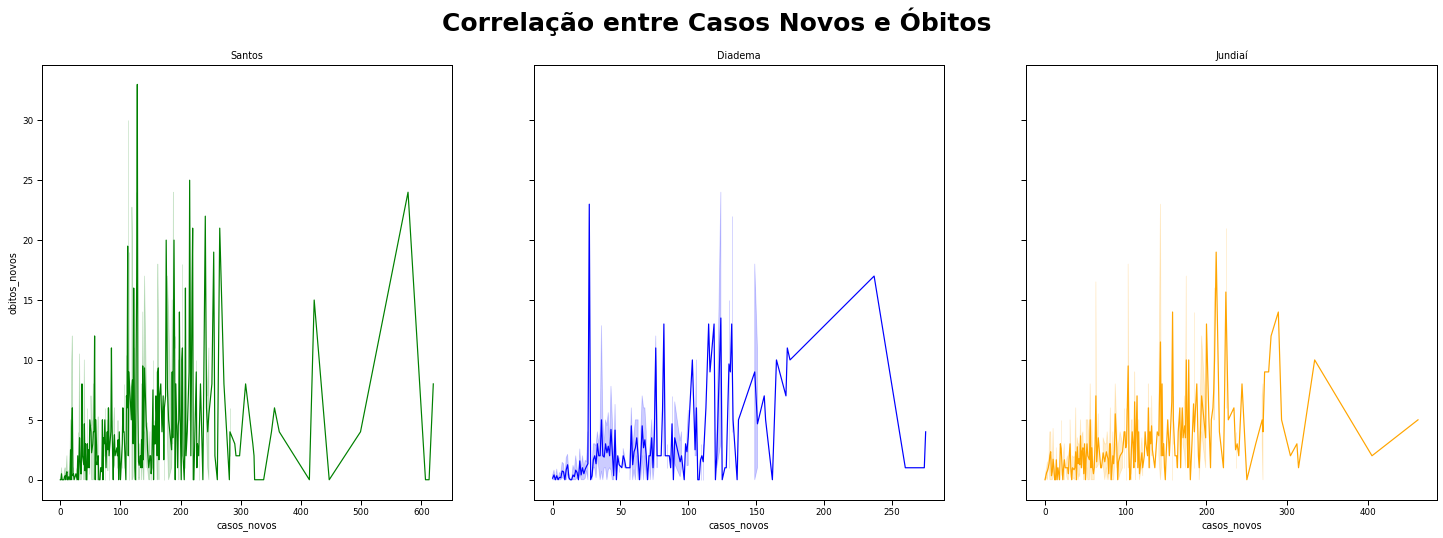

In [161]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Correlação entre Casos Novos e Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'casos_novos',
                     y = 'obitos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Vamos verificar também se alguma das cidades apresentou indício de sazonalidade, pela autocorrelação da série de casos novos.

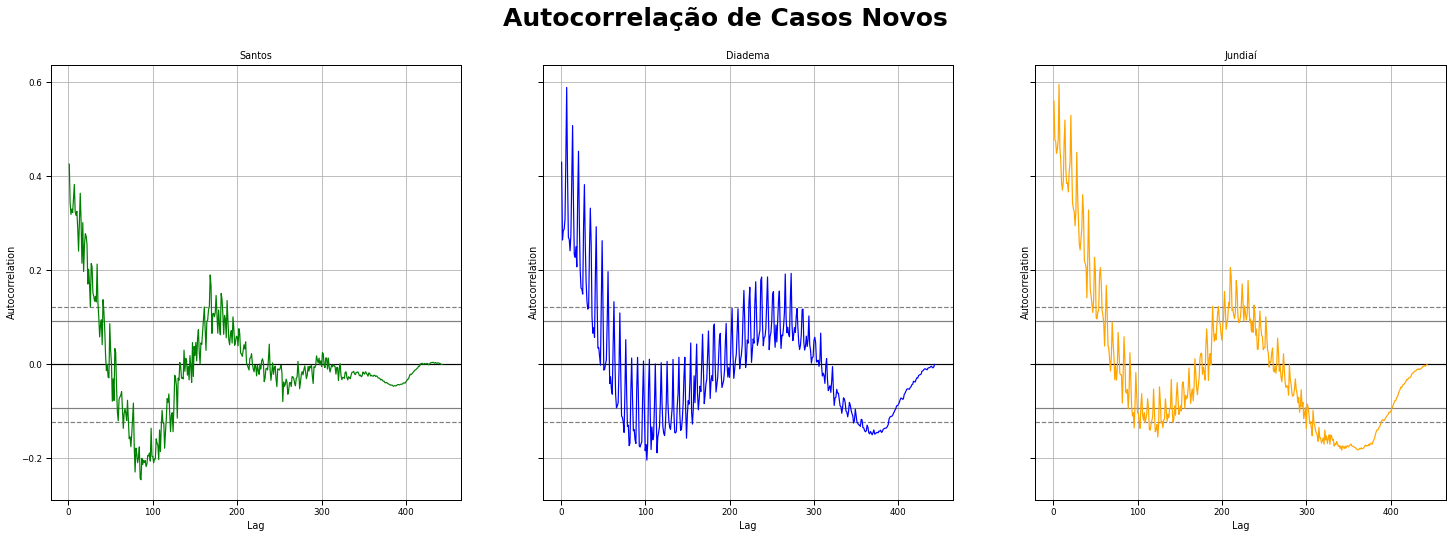

In [162]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['casos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo de São Paulo, não podemos verificar nenhum tipo de sazonalidade significativa.

Vamos verificar a autocorrelação da série de óbitos.

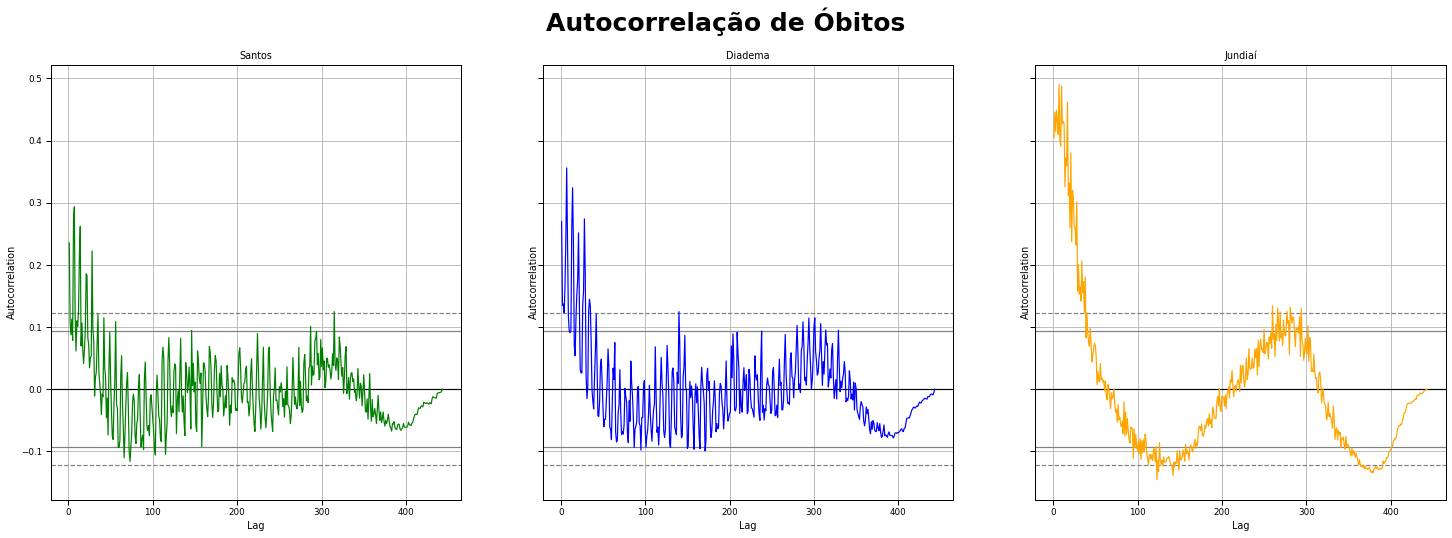

In [163]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['obitos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

As cidades escolhidas também não apresentaram sinais de sazonalidade em relação à série de óbitos.

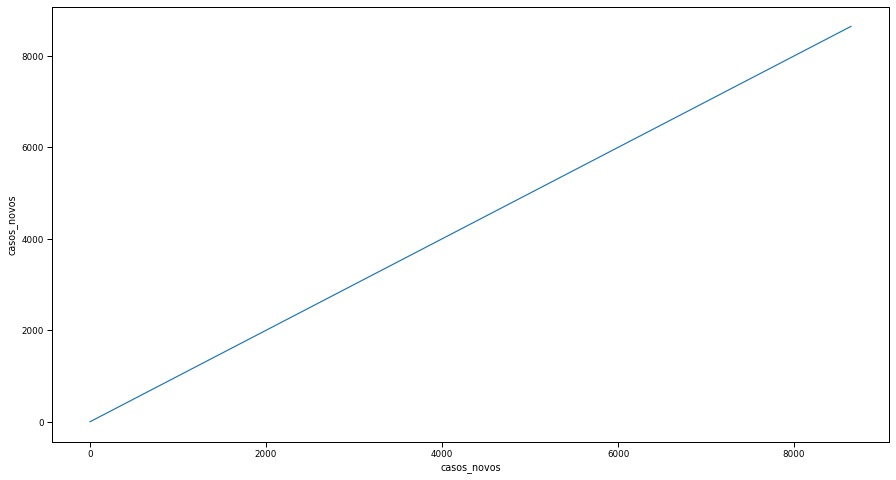

In [52]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

Correlação perfeita, pois esta positiva.

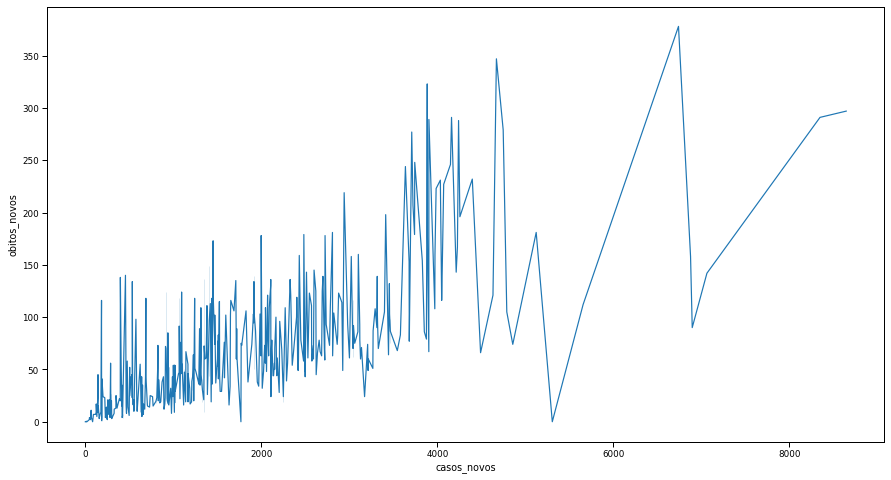

In [53]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [54]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

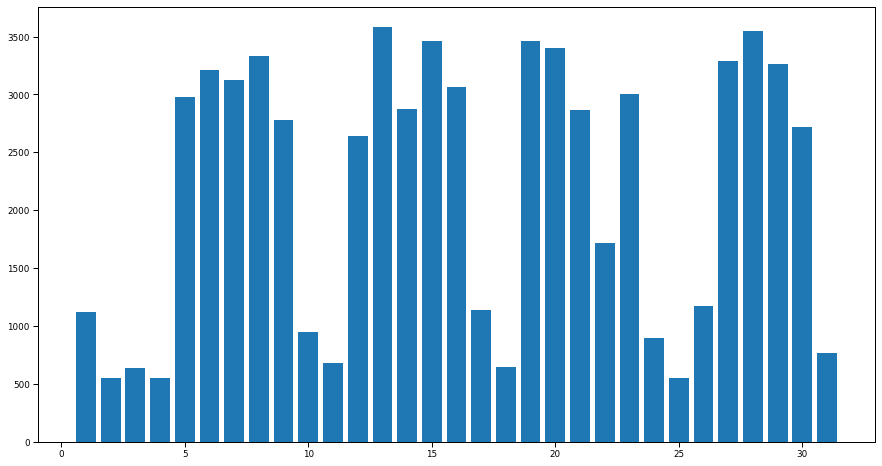

<BarContainer object of 28 artists>

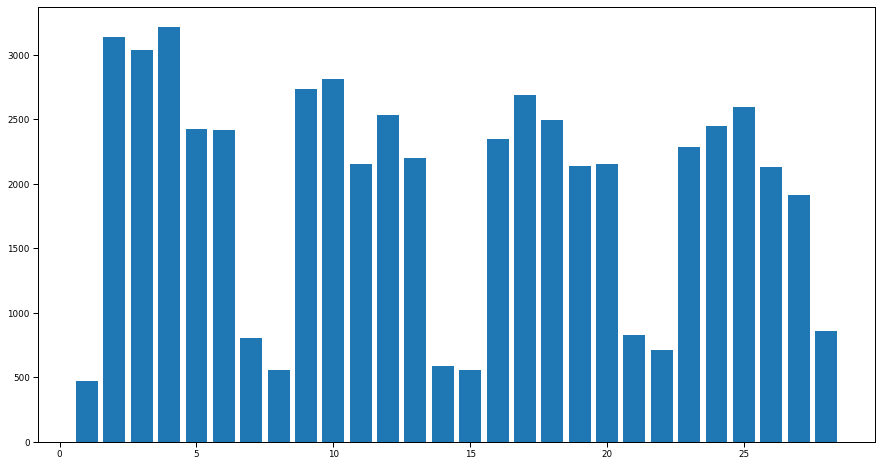

In [55]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])

In [56]:
from pandas.plotting import autocorrelation_plot

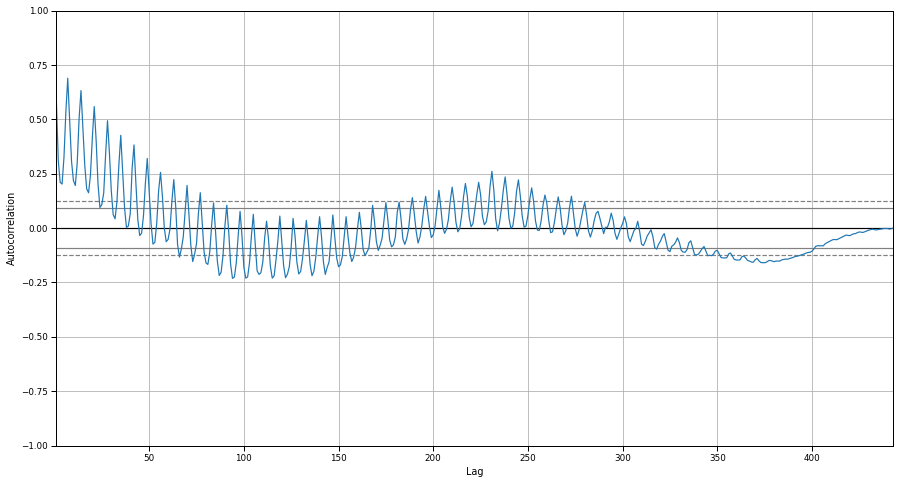

In [57]:
autocorrelation_plot(dados_sp['casos_novos'])

In [58]:
dados_sp.shape

(443, 38)

In [59]:
aleatorio = np.random.rand(443)

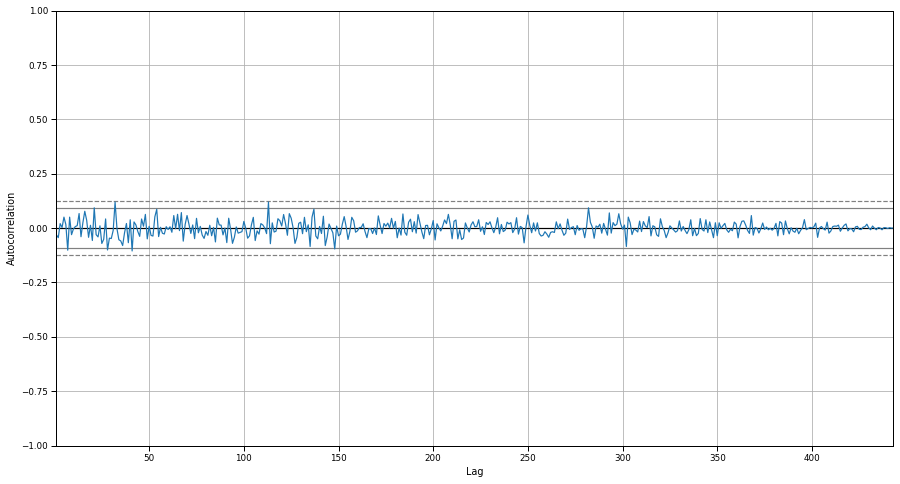

In [60]:
autocorrelation_plot(aleatorio)

# Aula 2.3

In [61]:
df = pd.DataFrame()

In [62]:
df['ds'] = dados_sp['datahora'][:400]

In [63]:
df['y'] = dados_sp['casos_novos'][:400]

In [64]:
dados_sp.shape

(443, 38)

In [65]:
df

ds     y
562    2020-02-25     0
1207   2020-02-26     0
1852   2020-02-27     0
2497   2020-02-28     1
3142   2020-02-29     0
...           ...   ...
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

[400 rows x 2 columns]

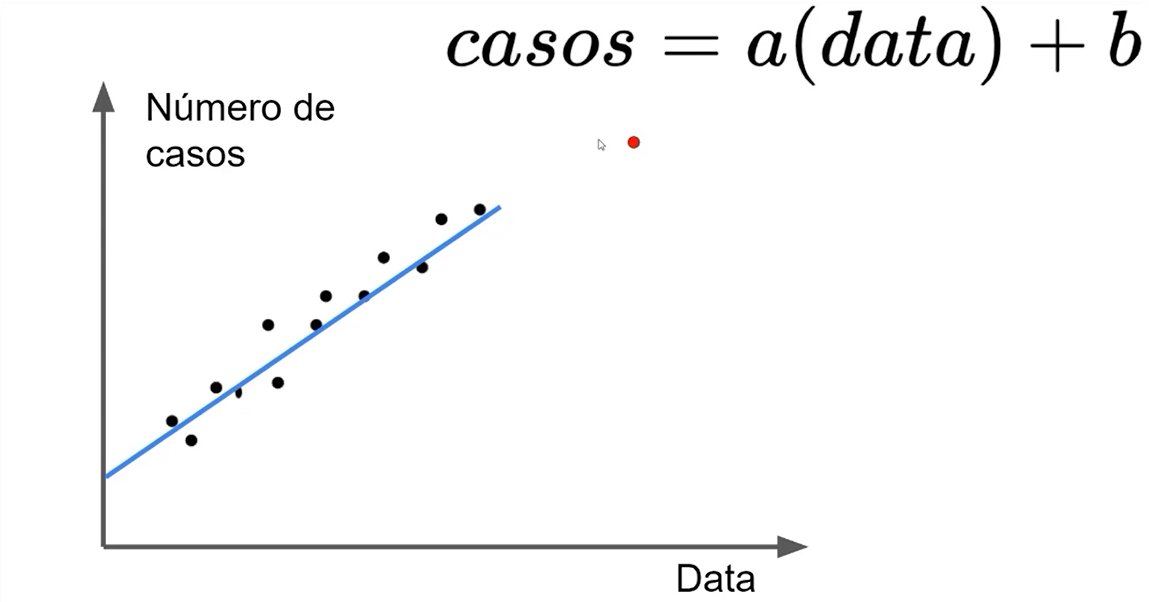

In [66]:
from fbprophet import Prophet

In [67]:
modelo = Prophet()

In [68]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [70]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [71]:
previsao = modelo.predict(dataframefuturo)

In [72]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -137.621348  ...                         0.0  320.078004
1 2020-02-26 -119.843618  ...                         0.0  337.016324
2 2020-02-27 -102.065887  ...                         0.0  494.014021
3 2020-02-28  -84.288157  ...                         0.0  256.493471
4 2020-02-29  -66.510426  ...                         0.0   -7.395631

[5 rows x 16 columns]

In [73]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

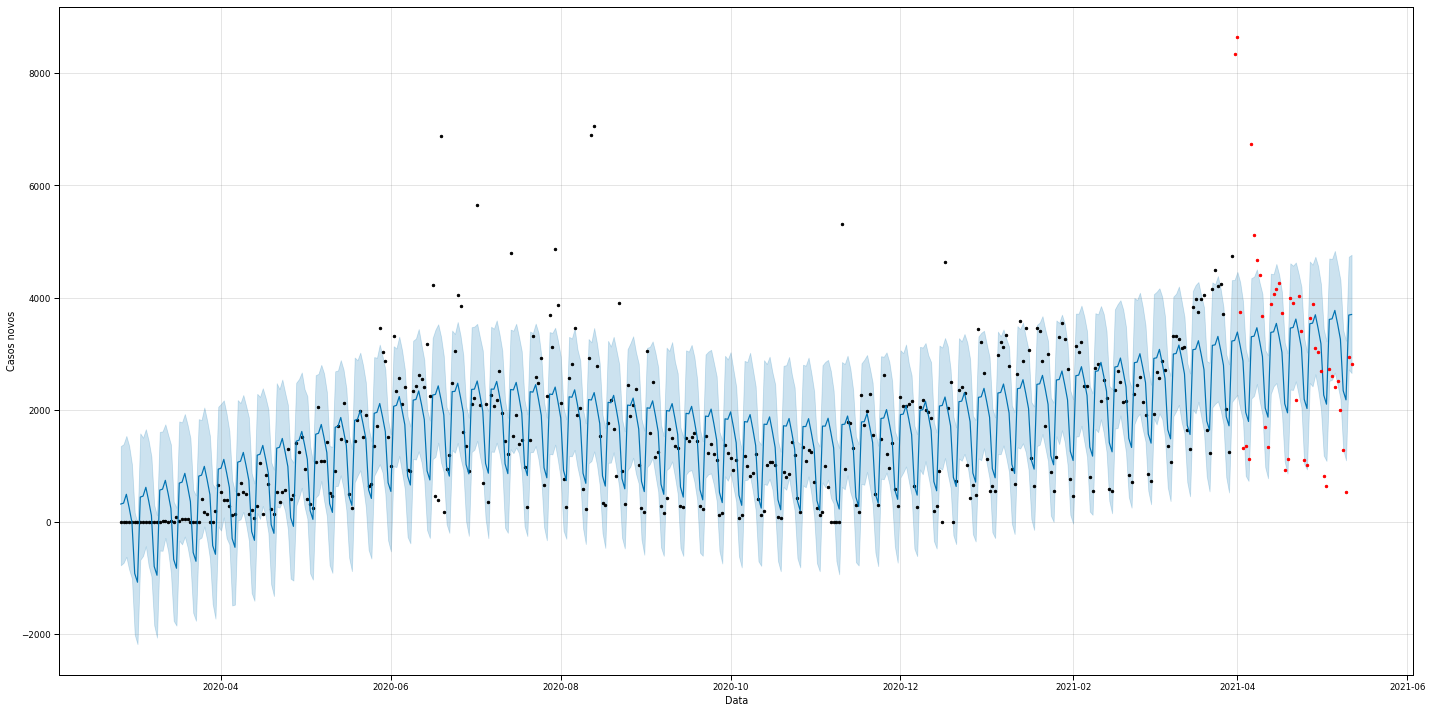

In [74]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10));
plt.plot(df_teste['ds'], df_teste['y'], '.r' )

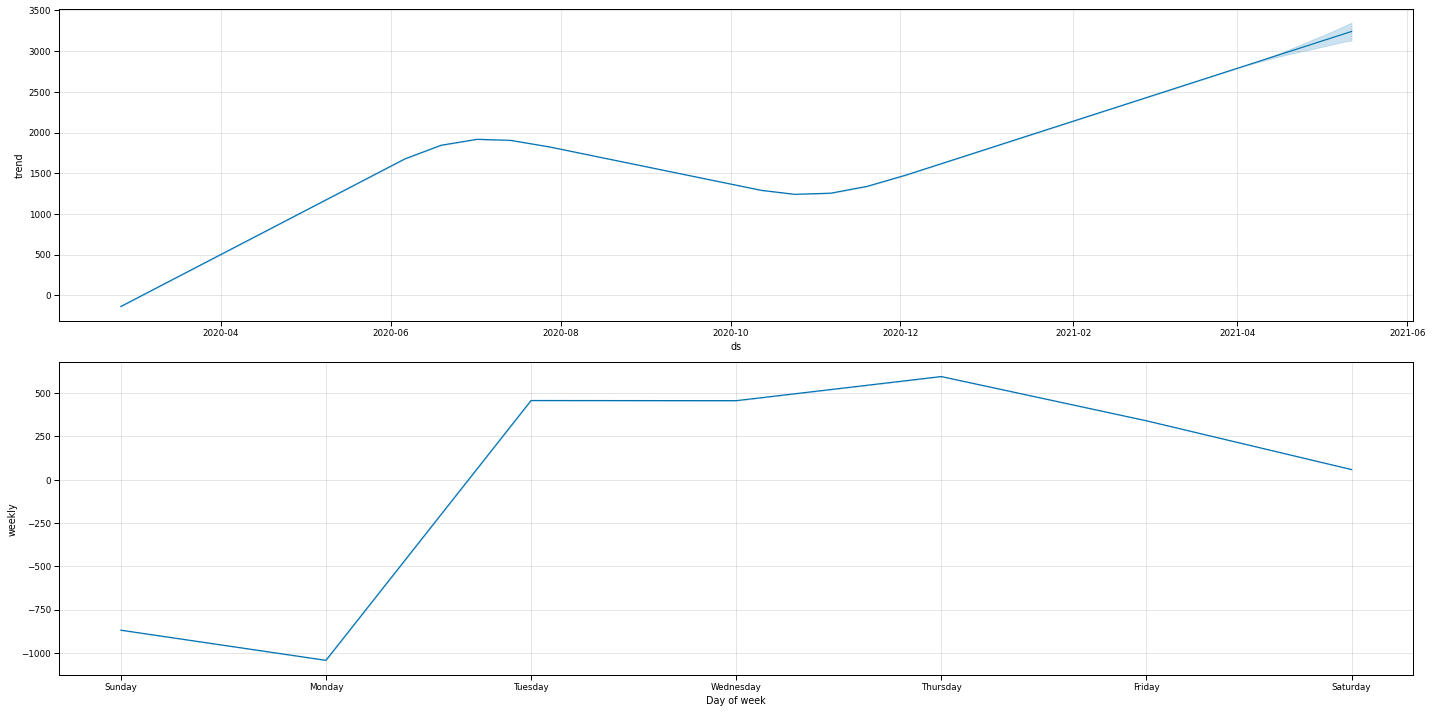

In [75]:
modelo.plot_components(previsao, figsize=(20,10));

Sazionalidade semanal

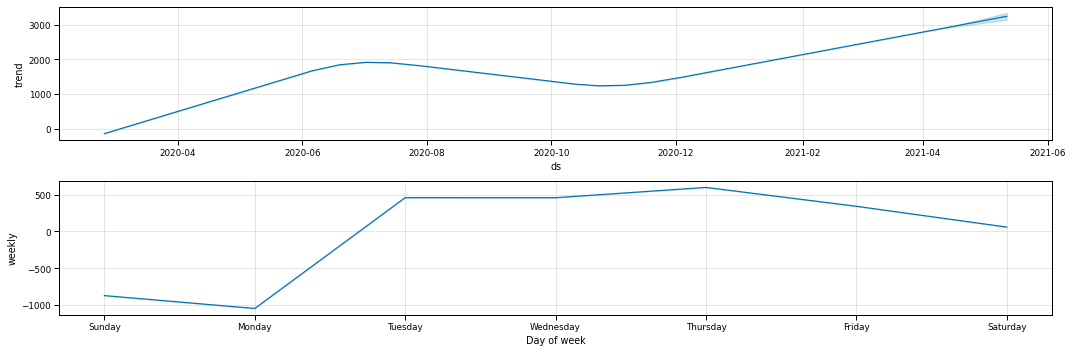

In [76]:
modelo.plot_components(previsao, figsize=(15,5));

## Desafio 08: Mudar os períodos de previsão

## Desafio 09: Explorar a documentação do Prophet

## Desafio 10: Deixar os gráficos mais bonitos

#Aula 3.3

In [77]:
from fbprophet.plot import add_changepoints_to_plot

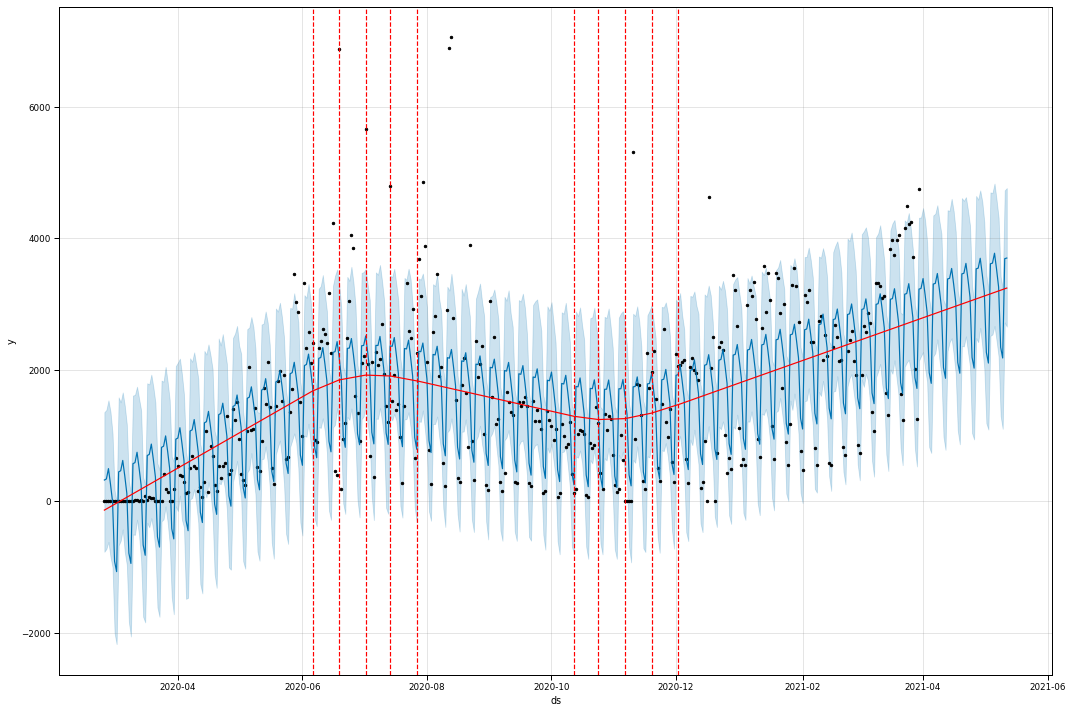

In [78]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [79]:
modelo = Prophet(n_changepoints=50)

In [80]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [82]:
previsao = modelo.predict(dataframefuturo)

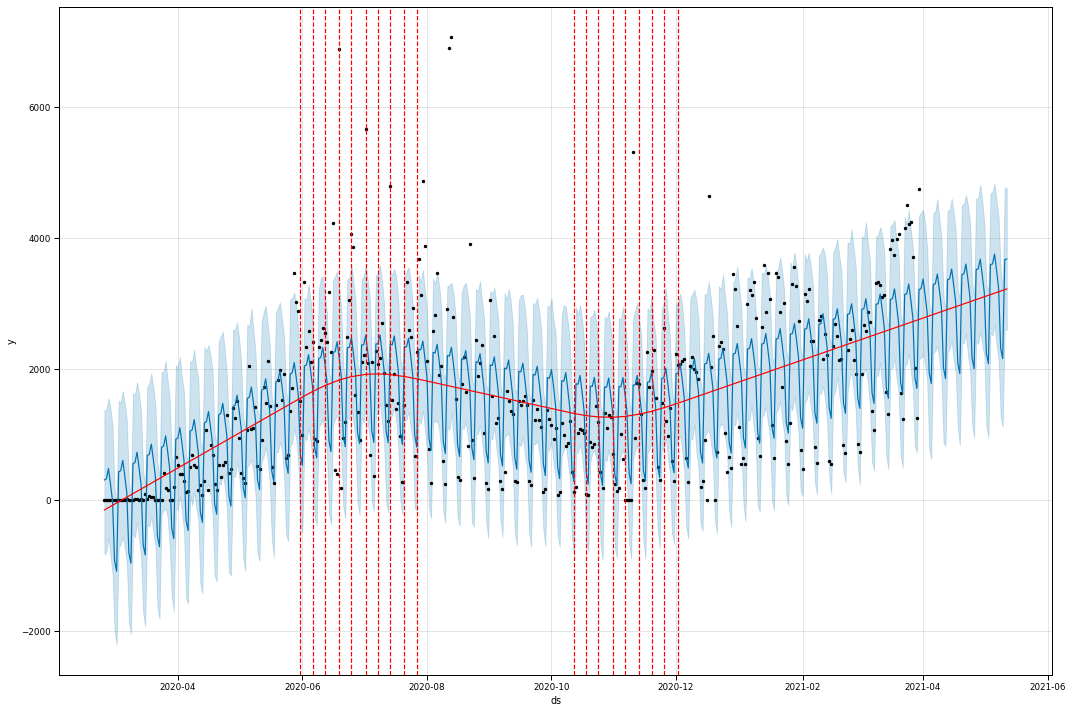

In [83]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [84]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)

In [85]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [87]:
previsao = modelo.predict(dataframefuturo)

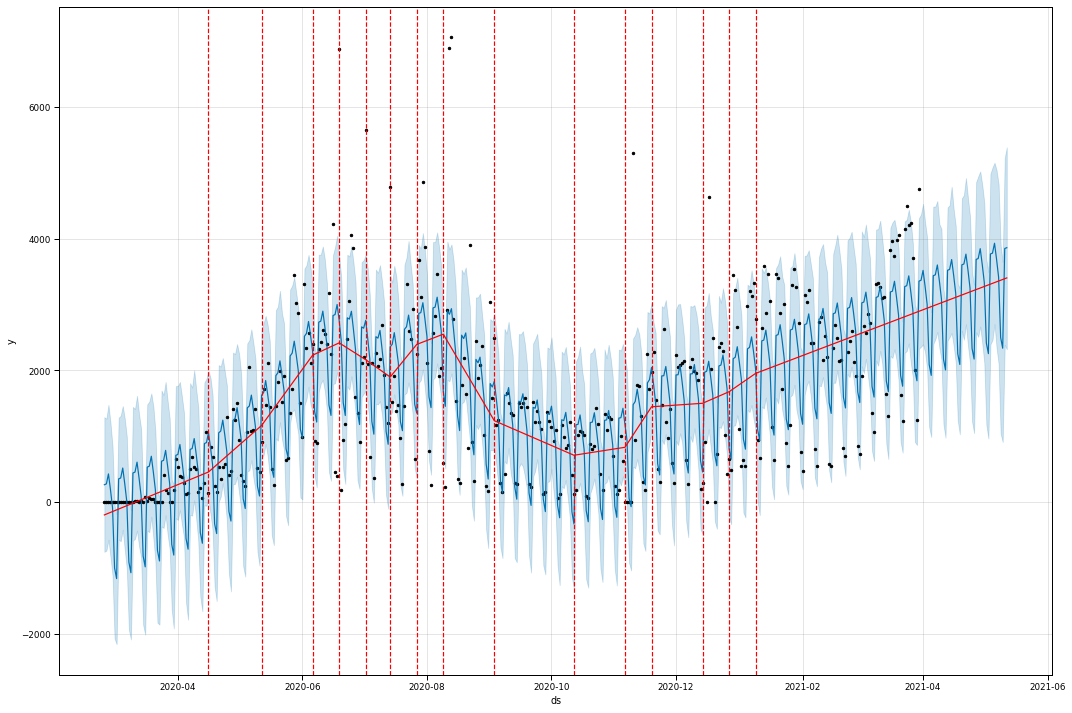

In [88]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [89]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.0005)

In [90]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [92]:
previsao = modelo.predict(dataframefuturo)

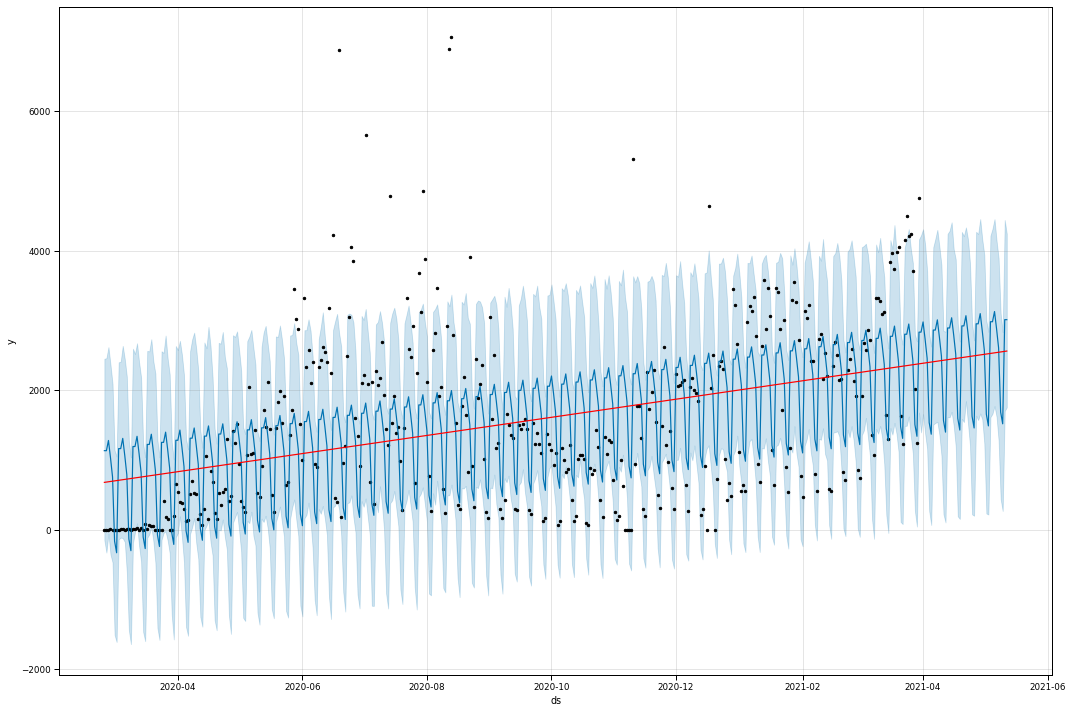

In [93]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [94]:
modelo = Prophet(changepoints=['2020-12-31'])

In [95]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [97]:
previsao = modelo.predict(dataframefuturo)

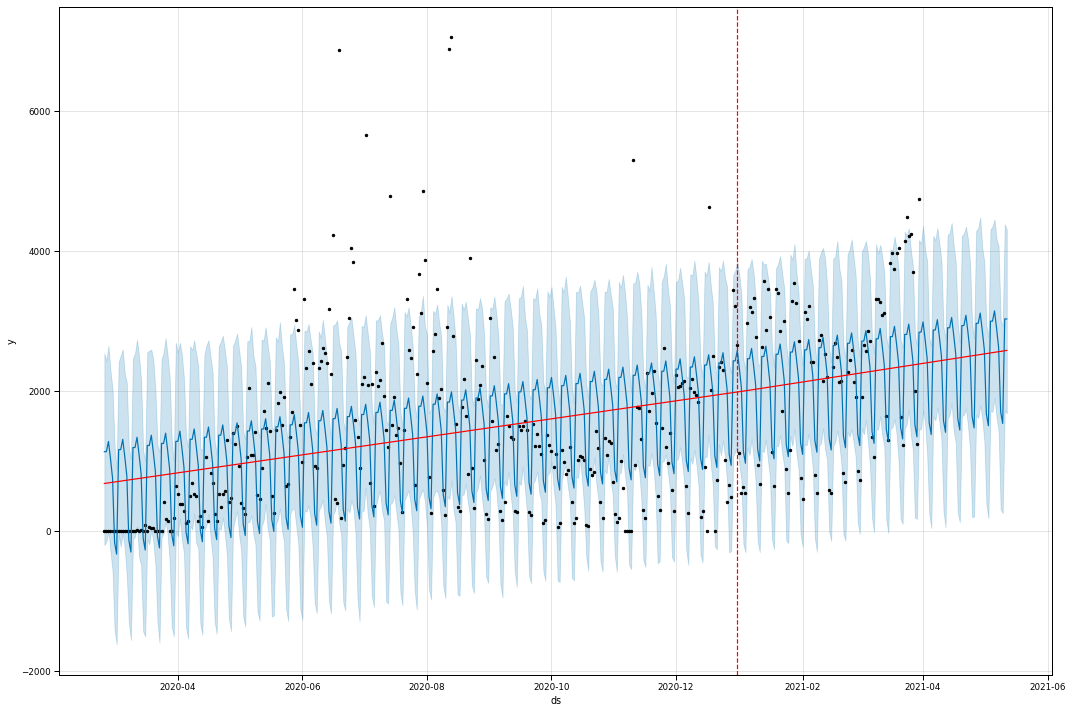

In [98]:
fig = modelo.plot(previsao, figsize=(15, 10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

## Desafio 01: Fazer todo o processo de previsão para o número de dados acumulados.

## Desafio 02: Identificar potenciais changepoints

## Desafio 03: Desenvolver uma função roda o modelo 

#Aula 4.3


In [99]:
modelo = Prophet(changepoint_prior_scale=10)

In [100]:
modelo.add_country_holidays(country_name='BR')

In [101]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [103]:
previsao = modelo.predict(dataframefuturo)

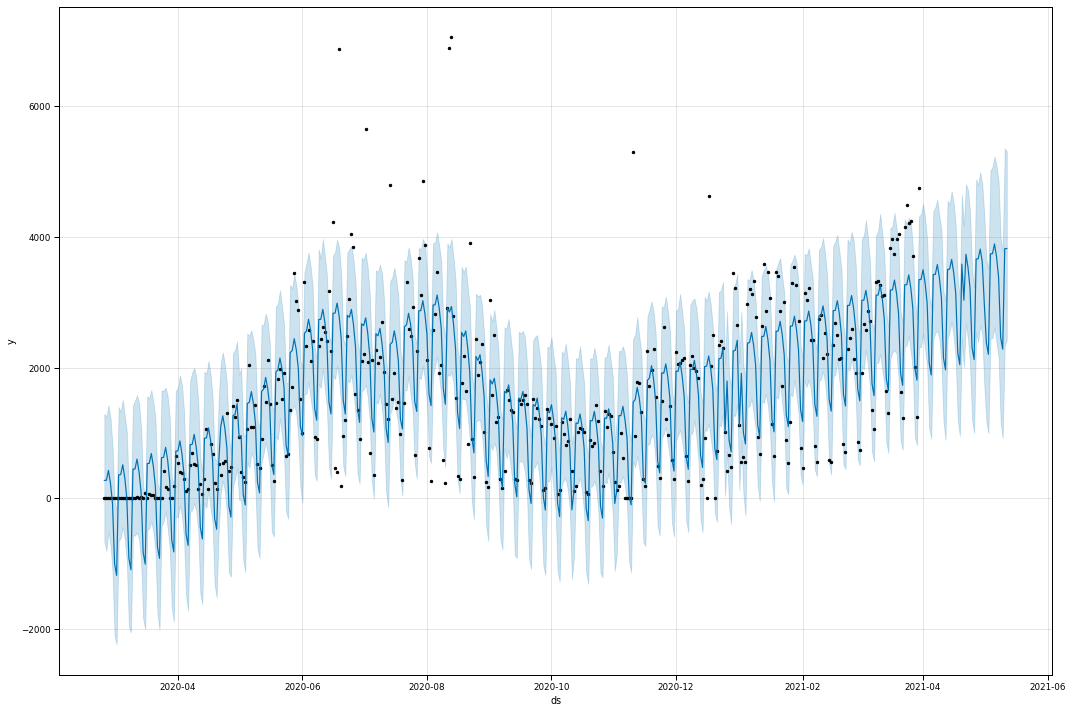

In [104]:
fig = modelo.plot(previsao, figsize=(15, 10))

In [105]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [106]:
feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020', 'ds':pd.to_datetime(feriados_sp_2020)})

In [107]:
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021', 'ds':pd.to_datetime(feriados_sp_2021)})

In [108]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [109]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados)

In [110]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [112]:
previsao = modelo_feriados.predict(dataframefuturo)

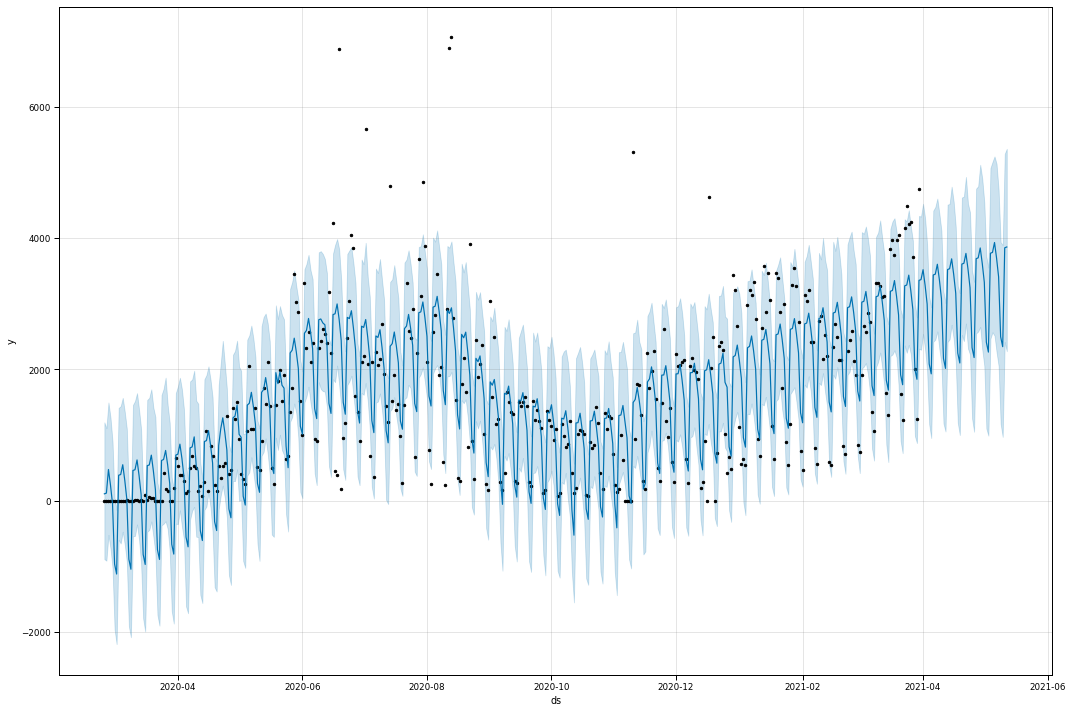

In [113]:
fig = modelo.plot(previsao, figsize=(15, 10))

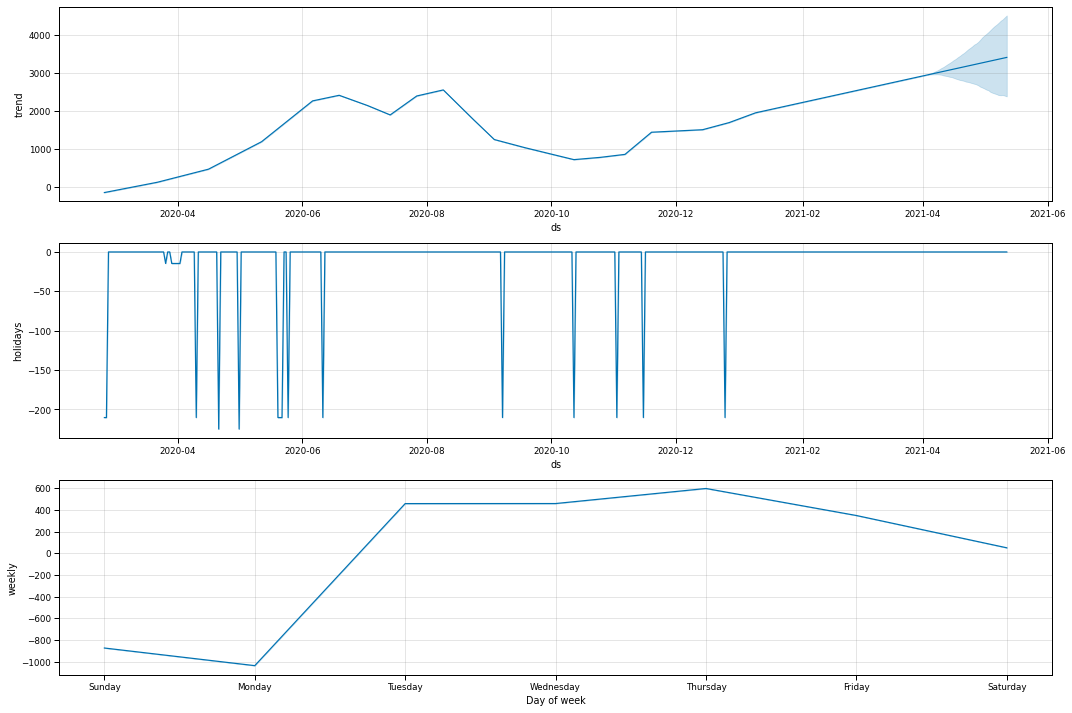

In [114]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [115]:
from sklearn.metrics import mean_absolute_error

In [116]:
# Sazonalidade aditiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

538.0474179988163

In [117]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

In [118]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [120]:
previsao = modelo_feriados.predict(dataframefuturo)

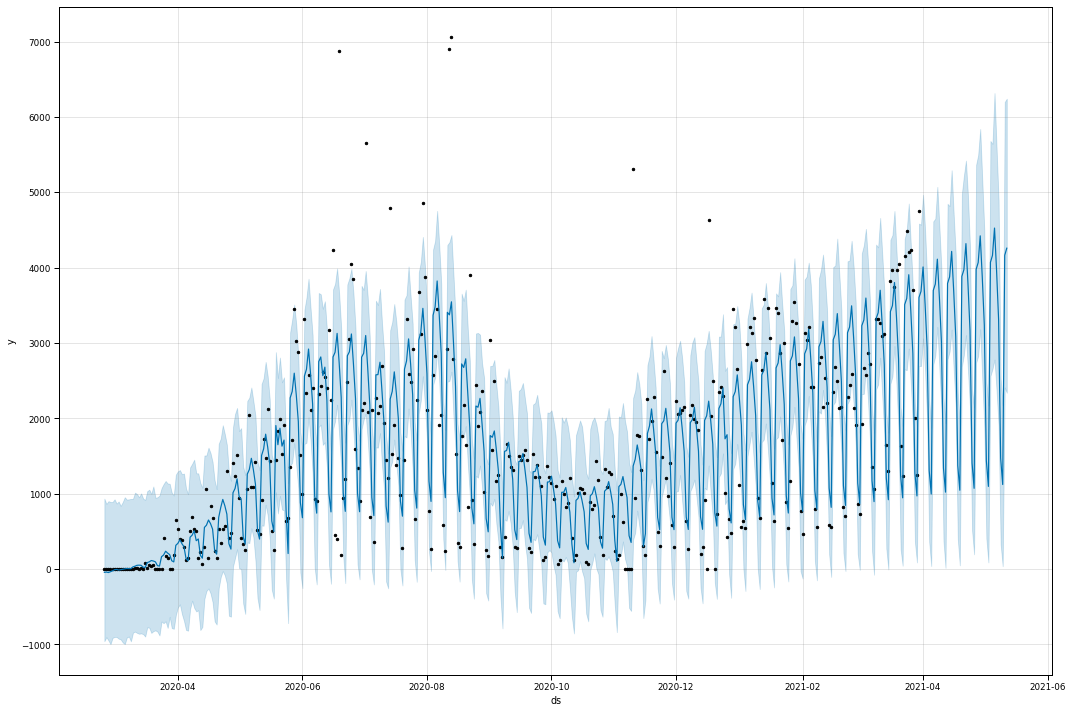

In [121]:
fig = modelo.plot(previsao, figsize=(15, 10))

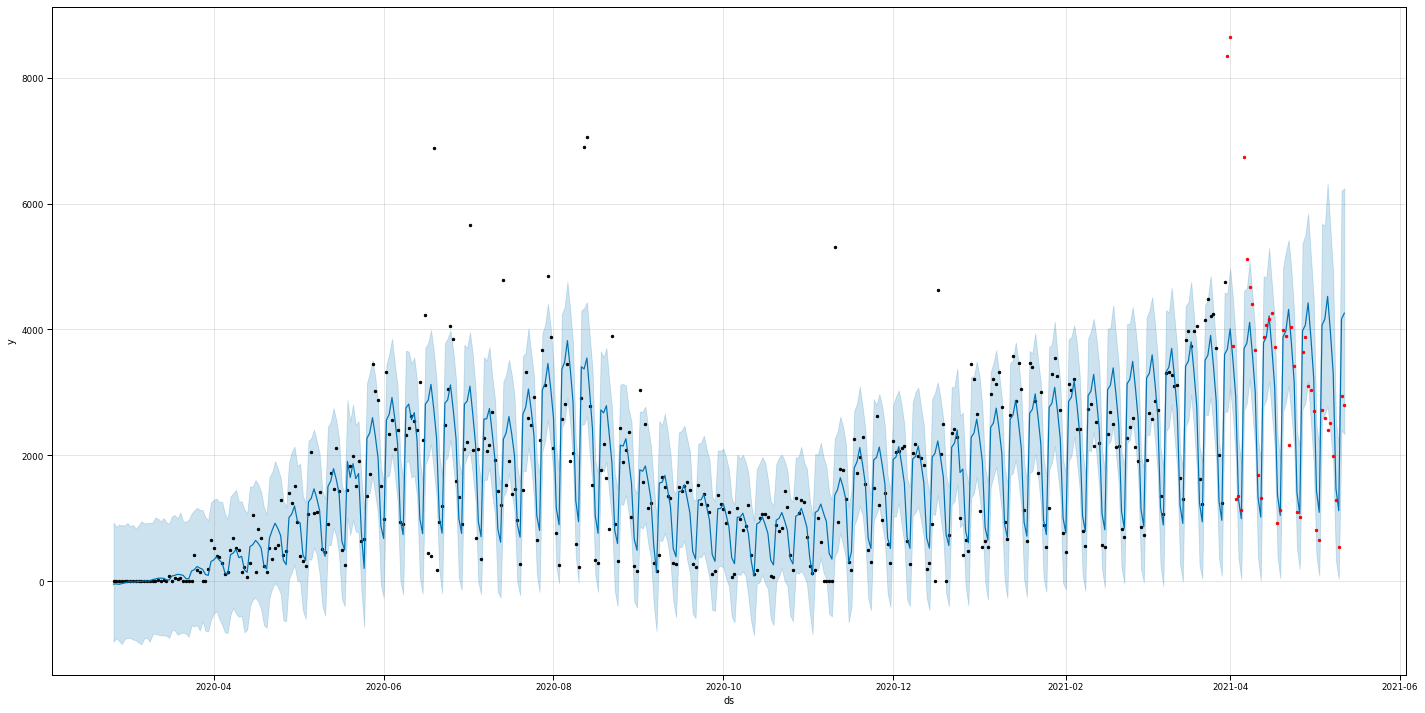

In [122]:
fig = modelo.plot(previsao, figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

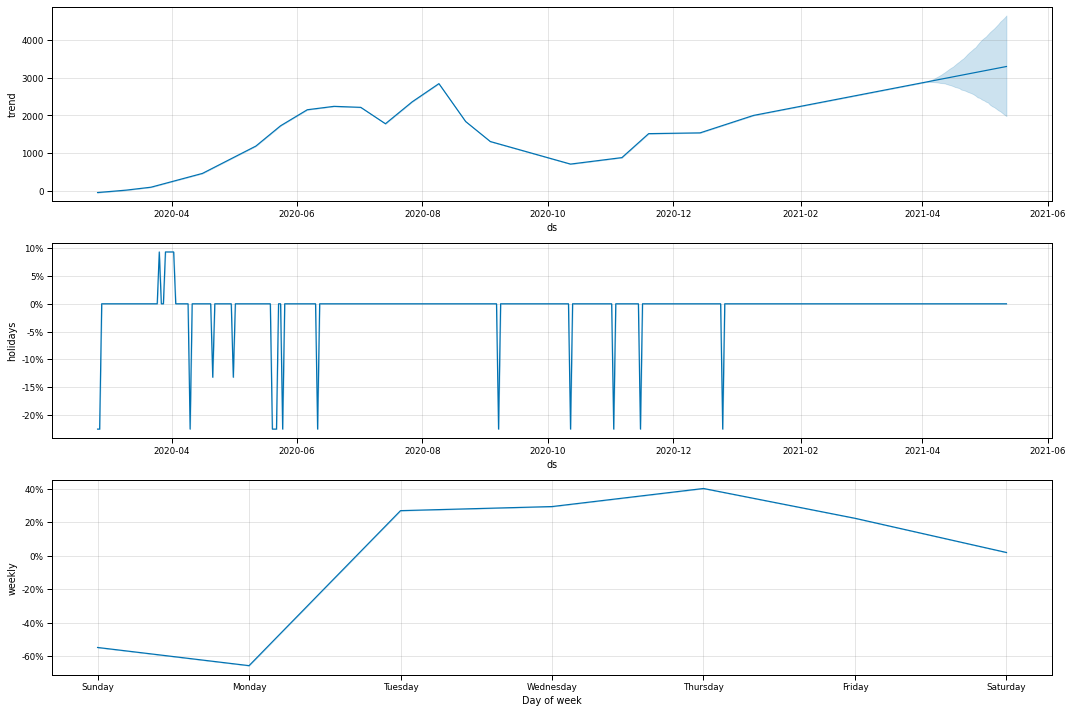

In [123]:
modelo_feriados.plot_components(previsao, figsize=(15,10));

In [124]:
# Sazonalidade multiplicativa
mean_absolute_error(df['y'], previsao['yhat'][:400])

452.2884903942229

## Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

# Aula 5.3

In [125]:
novo_y = df.reset_index()

In [126]:
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [127]:
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]

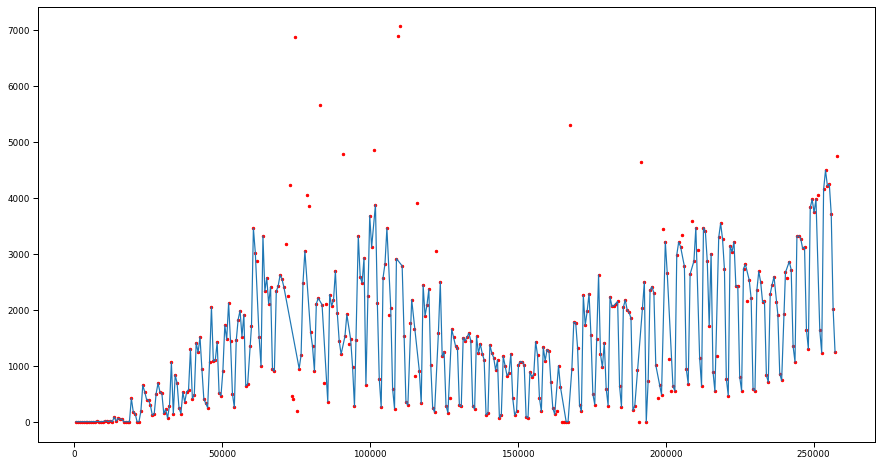

In [128]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [129]:
df_sem_outliers = sem_outliers[['ds', 'y']]

In [130]:
df_sem_outliers.head()

ds  y
0 2020-02-25  0
1 2020-02-26  0
2 2020-02-27  0
3 2020-02-28  1
4 2020-02-29  0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


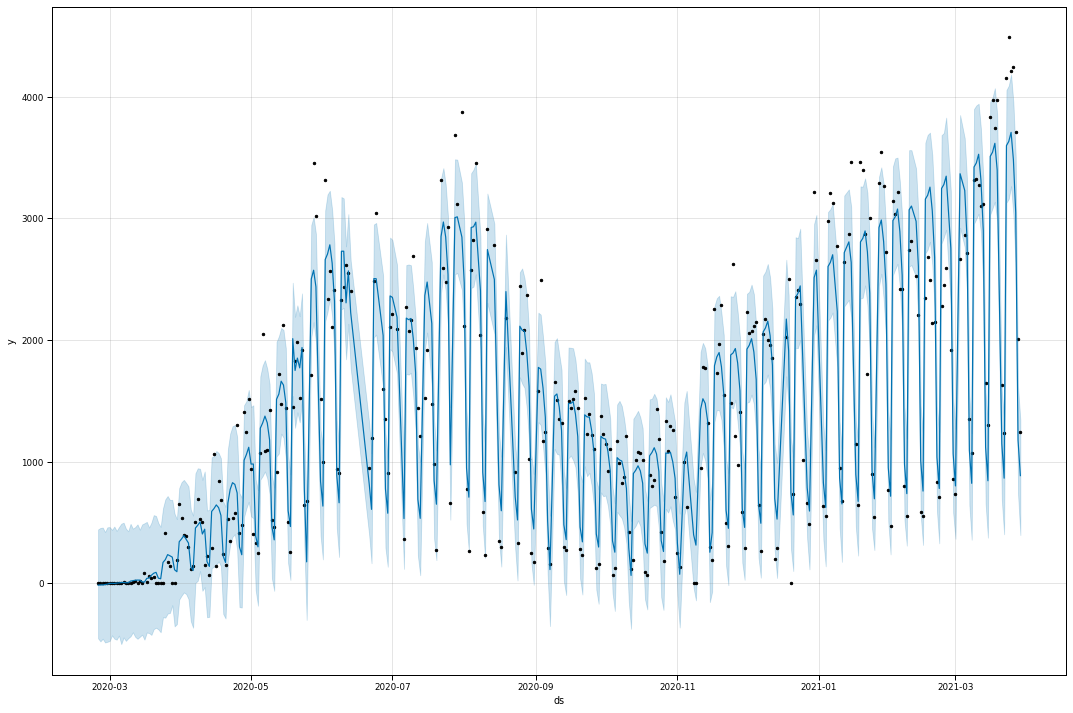

In [131]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=0)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


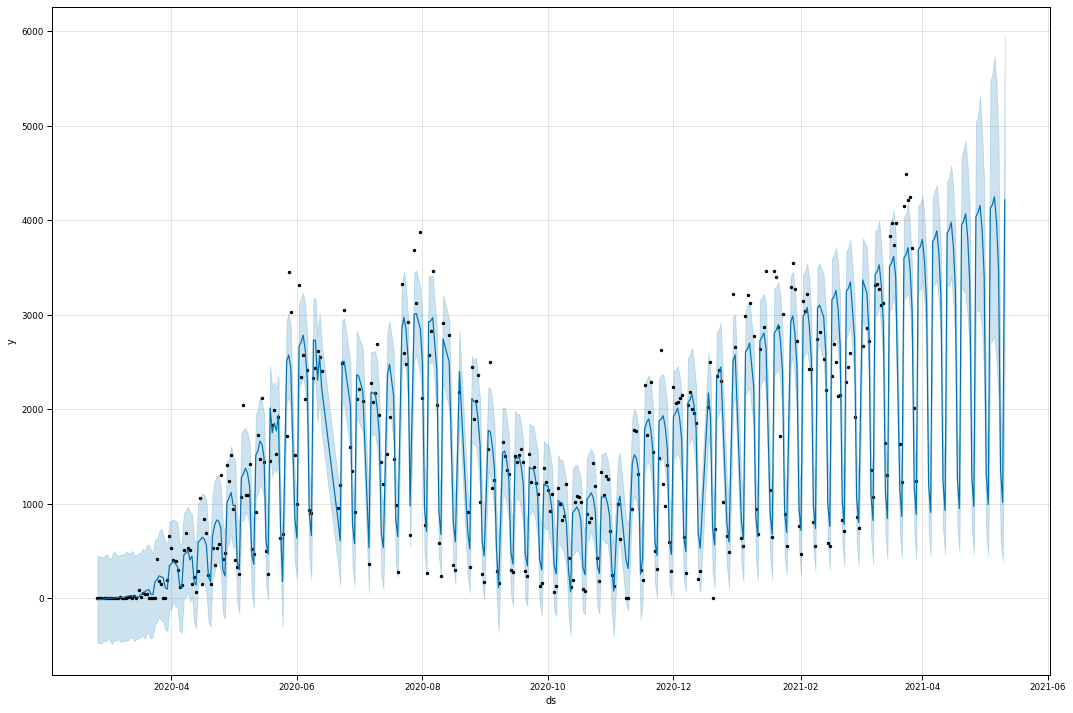

In [132]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(15,10))

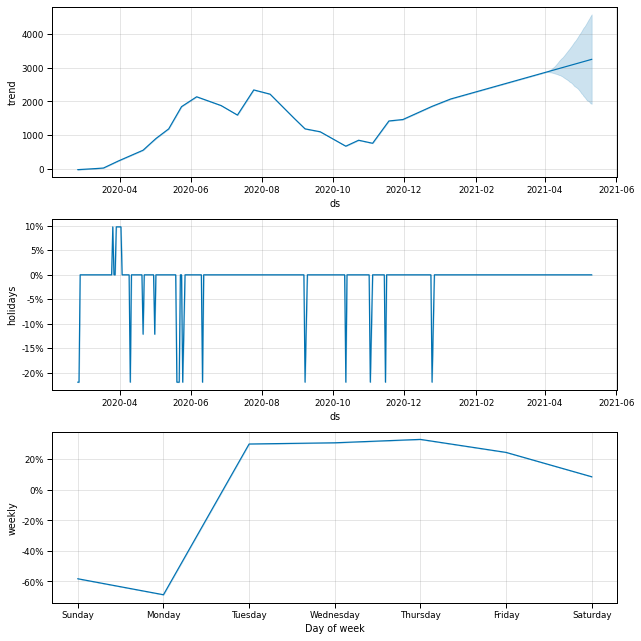

In [133]:
modelo_feriados.plot_components(previsao);

In [134]:
amostras = modelo_feriados.predictive_samples(previsao)

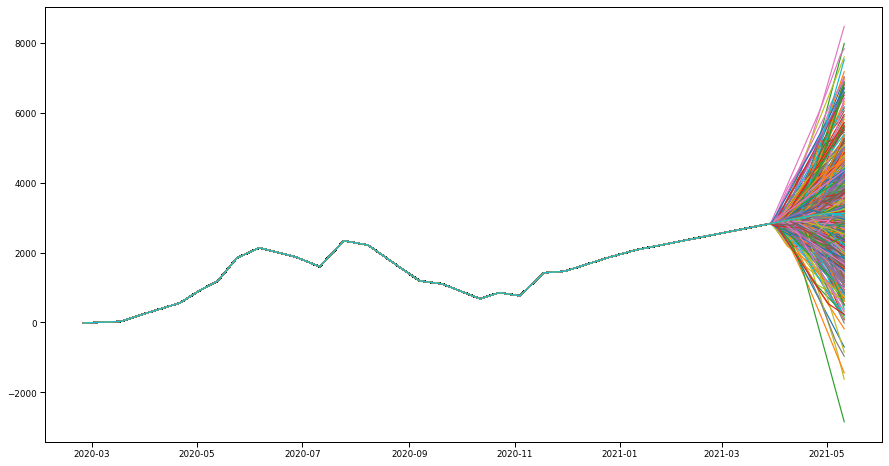

In [135]:
plt.plot(previsao['ds'], amostras['trend']);

## Desafio 01: Testar diferentes intervalos de confiança

In [136]:
from fbprophet.diagnostics import cross_validation

In [137]:
df_cv = cross_validation(modelo_feriados, initial='180  days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [138]:
janela = 5

In [139]:
df_cv.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2020-09-02  2009.134261  1536.211296  2422.845219  1579 2020-08-31
1 2020-09-03  2057.731380  1629.127093  2470.392688  2496 2020-08-31
2 2020-09-04  2120.313318  1701.362185  2555.690283  1166 2020-08-31
3 2020-09-05  1594.553458  1119.539993  2009.058835  1245 2020-08-31
4 2020-09-06   684.438108   252.071640  1116.350126   290 2020-08-31

In [140]:
cutoff = df_cv['cutoff'].unique()

In [141]:
cutoff

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [142]:
cutoff = df_cv['cutoff'].unique()[janela]

In [143]:
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

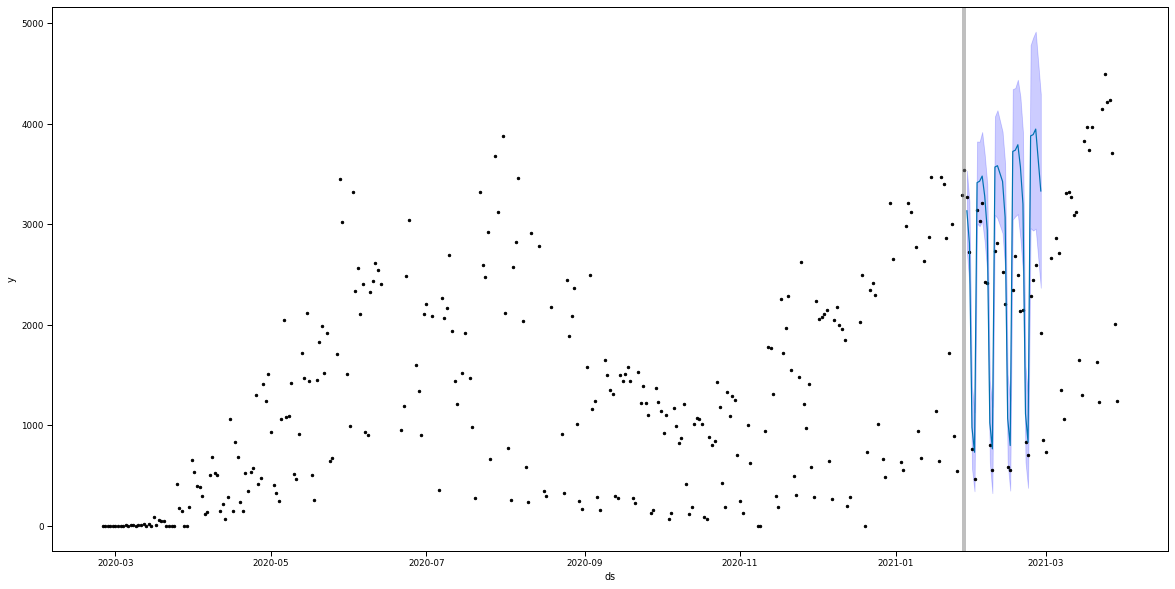

In [144]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [145]:
from fbprophet.diagnostics import performance_metrics

In [146]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [147]:
df_p

horizon            mse        rmse         mae     mdape  coverage
0   3 days   78795.534334  280.705423  204.732675  0.162260  0.833333
1   4 days  112449.051750  335.334239  256.257006  0.178224  0.824074
2   5 days  106174.925238  325.844940  258.054707  0.179052  0.873016
3   6 days  125958.062133  354.905709  285.702651  0.158378  0.888889
4   7 days   81862.956989  286.117034  243.208227  0.123644  0.944444
5   8 days  149440.350668  386.575155  318.498951  0.164958  0.777778
6   9 days  144797.651736  380.522866  315.503867  0.164748  0.722222
7  10 days  163798.704107  404.720526  352.661355  0.248221  0.722222
8  11 days  126065.555722  355.057116  313.376211  0.245236  0.793651
9  12 days  129985.928248  360.535613  290.696092  0.173596  0.833333
10 13 days  194713.892944  441.263972  343.110606  0.142024  0.759259
11 14 days  236363.221124  486.172008  388.173266  0.250772  0.682540
12 15 days  303206.454121  550.641856  472.316275  0.418343  0.571429
13 16 days  281640.527994  530.698151  442.616159  0.347468  0.555556
14 17 days  293841.942045  542.071897  455.664002  0.314830  0.555556
15 18 days  377067.134498  614.057924  481.240232  0.271900  0.583333
16 19 days  471620.574083  686.746368  529.064049  0.259452  0.555556
17 20 days  587300.209386  766.355146  599.110482  0.301501  0.577778
18 21 days  651412.897604  807.101541  647.475641  0.348037  0.547619
19 22 days  662277.242762  813.804180  670.545830  0.320746  0.547619
20 23 days  529062.097614  727.366550  594.237259  0.476989  0.611111
21 24 days  457588.098347  676.452584  551.936918  0.327978  0.682540
22 25 days  460735.755923  678.775188  532.129281  0.363118  0.769841
23 26 days  791634.401516  889.738389  663.275822  0.333557  0.714286
24 27 days  915219.882289  956.671251  740.014831  0.350296  0.682540
25 28 days  924700.121410  961.613291  756.027548  0.443255  0.634921
26 29 days  659683.041822  812.208743  654.764659  0.443255  0.722222
27 30 days  558080.796647  747.048055  605.315207  0.499135  0.722222

In [148]:
from fbprophet.plot import plot_cross_validation_metric

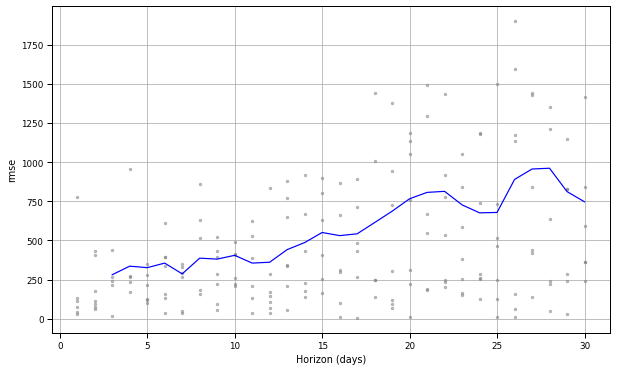

In [149]:
plot_cross_validation_metric(df_cv, metric='rmse');

## Buscar quais métricas se aplicam a quais casos.